# Running Main

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp
import xobjects as xo


# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')
sys.path.append('/home/phbelang/abp/BBStudies')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst

# JOB imports
import importlib
sys.path.append('../../')
main_002 = importlib.import_module('Jobs.002_user_specific_tasks.main')
main = importlib.import_module('Jobs.003_particle_dist_and_track.main')
user_specific_tasks = main_002.user_specific_tasks


config = {
    
    'tracking': {

        'user_context'  : 'CPU',
        'collider_path' : '../001_configure_collider/zfruits/collider_001.json',
        'tracking_path' : 'zfruits/tracking',

        'sequence': 'lhcb1',
        'n_parts' : 100,
        'n_turns' : 1e3},


    'monitor':{

        'start_at_turn'    : 0,
        'stop_at_turn'     : 'n_turns',
        'n_repetitions'    : 1,
        'repetition_period': 1}}




# Loading collider
print('LOADING COLLIDER')
collider,context = main.load_collider(  collider_path = config['tracking']['collider_path'],
                                        user_context  = config['tracking']['user_context'])

# Parsing config
sequence = config['tracking']['sequence']
line    = collider[sequence]
n_parts = int(config['tracking']['n_parts'])
n_turns = int(config['tracking']['n_turns'])
#----------------------------------


# Generating particle distribution
#----------------------------------
# Extracting emittance from previous config
config_bb = main.read_configuration('../001_configure_collider/config.yaml')
beam = sequence[-2:]
bunch_number = config_bb['config_collider']['config_beambeam']['mask_with_filling_pattern'][f'i_bunch_{beam}'] 
nemitt_x,nemitt_y = (config_bb['config_collider']['config_beambeam'][f'nemitt_{plane}'] for plane in ['x','y'])
#-----------------------
print('GENERATING PARTICLES')
particles,coordinates = main.generate_particles( n_part      = n_parts,
                                            force_n_part= False,
                                            nemitt_x    = nemitt_x,
                                            nemitt_y    = nemitt_y,
                                            line        = line,
                                                _context   = context)
#----------------------------------


# Tracking
#----------------------------------
print('START TRACKING...')
tracked = xPlus.Tracking_Interface( line      = line,
                                    particles = particles,
                                    n_turns   = n_turns,
                                    progress  = True,
                                    progress_turn_chunk= 100,
                                    rebuild   = False,
                                    monitor   = None,
                                    method    ='6D',
                                    _context   = context)

# Saving emittance:
tracked.nemitt_x    = nemitt_x
tracked.nemitt_y    = nemitt_y
tracked.nemitt_zeta = 1#nemitt_zeta

#----------------------------------




# Saving results
#----------------------------------
# Preparing output folder
if not Path('zfruits').exists():
    Path('zfruits').mkdir()
    

parquet_path = config['tracking']['tracking_path']
bunch_ID     = str(bunch_number).zfill(4)
print(f'SAVING TO PARQUET... -> {parquet_path}')
# Setting Bunch number for partitionning
tracked.to_parquet(parquet_path,partition_name='BUNCH',partition_ID=bunch_ID)
#----------------------------------



LOADING COLLIDER
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


c31f5b9b432c4bedbd023db90f3d9d87.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
c31f5b9b432c4bedbd023db90f3d9d87.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
c31f5b9b432c4bedbd023db90f3d9d87.c:13218:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
c31f5b9b432c4bedbd023db90f3d9d87.c:13484:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
c31f5b9b432c4bedbd023db90f3d9d87.c:13575:12: warning: unused variable 'e_loss_primary_tot' [-Wunused-variable]
    double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
           ^
c31f5b9b432c4bedbd023db90f3d9d87.c:13572:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_pri

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


1a51535b68564d36b773e3a9af29b3df.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
1a51535b68564d36b773e3a9af29b3df.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
1a51535b68564d36b773e3a9af29b3df.c:13218:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
1a51535b68564d36b773e3a9af29b3df.c:13484:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
1a51535b68564d36b773e3a9af29b3df.c:13572:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
1a51535b68564d36b773e3a9af29b3df.c:13

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


83a2beb018b6403ab6dae35885517f79.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
83a2beb018b6403ab6dae35885517f79.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
2 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


f8f8b970815c435c8084f943a275d6d6.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
f8f8b970815c435c8084f943a275d6d6.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
2 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
GENERATING PARTICLES
START TRACKING...


Output()

SAVING TO PARQUET... -> zfruits/tracking


In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp
import xobjects as xo


# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')
sys.path.append('/home/phbelang/abp/BBStudies')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst

# JOB imports
import importlib
sys.path.append('../../')
main_002 = importlib.import_module('Jobs.002_user_specific_tasks.main')
main = importlib.import_module('Jobs.003_particle_dist_and_track.main')
user_specific_tasks = main_002.user_specific_tasks


config = {
    
    'tracking': {

        'user_context'  : 'CPU',
        'collider_path' : '../001_configure_collider/zfruits/collider_001.json',
        'tracking_path' : 'zfruits/tracking',

        'sequence': 'lhcb1',
        'n_parts' : 100,
        'n_turns' : 1e3},


    'monitor':{

        'start_at_turn'    : 0,
        'stop_at_turn'     : 'n_turns',
        'n_repetitions'    : 1,
        'repetition_period': 1}}




# Loading collider
print('LOADING COLLIDER')
collider,context = main.load_collider(  collider_path = config['tracking']['collider_path'],
                                        user_context  = config['tracking']['user_context'])

# Parsing config
sequence = config['tracking']['sequence']
line    = collider[sequence]
n_parts = int(config['tracking']['n_parts'])
n_turns = int(config['tracking']['n_turns'])
#----------------------------------


# Generating particle distribution
#----------------------------------
# Extracting emittance from previous config
config_bb = main.read_configuration('../001_configure_collider/config.yaml')
beam = sequence[-2:]
bunch_number = config_bb['config_collider']['config_beambeam']['mask_with_filling_pattern'][f'i_bunch_{beam}'] 
nemitt_x,nemitt_y = (config_bb['config_collider']['config_beambeam'][f'nemitt_{plane}'] for plane in ['x','y'])
#-----------------------
print('GENERATING PARTICLES')
particles,coordinates = main.generate_particles( n_part      = n_parts,
                                            force_n_part= False,
                                            nemitt_x    = nemitt_x,
                                            nemitt_y    = nemitt_y,
                                            line        = line,
                                                _context   = context)
#----------------------------------


# Tracking
#----------------------------------
print('START TRACKING...')
tracked = xPlus.Tracking_Interface( line      = line,
                                    particles = particles,
                                    n_turns   = n_turns,
                                    progress  = True,
                                    progress_turn_chunk= 1,
                                    rebuild   = False,
                                    monitor   = None,
                                    method    ='6D',
                                    _context   = context)

# Saving emittance:
tracked.nemitt_x    = nemitt_x
tracked.nemitt_y    = nemitt_y
tracked.nemitt_zeta = 1#nemitt_zeta

#----------------------------------




# Saving results
#----------------------------------
# Preparing output folder
if not Path('zfruits').exists():
    Path('zfruits').mkdir()
    

parquet_path = config['tracking']['tracking_path']
bunch_ID     = str(bunch_number).zfill(4)
print(f'SAVING TO PARQUET... -> {parquet_path}')
# Setting Bunch number for partitionning
tracked.to_parquet(parquet_path,partition_name='BUNCH',partition_ID='0001')
#----------------------------------



LOADING COLLIDER
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


1cd5ee458d4441718862f91206b04031.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
1cd5ee458d4441718862f91206b04031.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
1cd5ee458d4441718862f91206b04031.c:13218:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
1cd5ee458d4441718862f91206b04031.c:13484:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
1cd5ee458d4441718862f91206b04031.c:13575:12: warning: unused variable 'e_loss_primary_tot' [-Wunused-variable]
    double e_loss_primary_tot = 0.0;  // [GeV] total energy lost by the macroparticle
           ^
1cd5ee458d4441718862f91206b04031.c:13572:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_pri

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


7f5901dec47e49caad2cc17a5d0d25b8.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
7f5901dec47e49caad2cc17a5d0d25b8.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
7f5901dec47e49caad2cc17a5d0d25b8.c:13218:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
7f5901dec47e49caad2cc17a5d0d25b8.c:13484:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
7f5901dec47e49caad2cc17a5d0d25b8.c:13572:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
7f5901dec47e49caad2cc17a5d0d25b8.c:13

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


b997ff1cbce54772a0e6af66247beb88.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
b997ff1cbce54772a0e6af66247beb88.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
2 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


3d8079bf26294b5e85c0b2f83cfb1c90.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
3d8079bf26294b5e85c0b2f83cfb1c90.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
2 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
GENERATING PARTICLES
START TRACKING...


Output()

SAVING TO PARQUET... -> zfruits/tracking


In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp
import xobjects as xo


# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')
sys.path.append('/home/phbelang/abp/BBStudies')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst

# JOB imports
import importlib
sys.path.append('../../')
main_002 = importlib.import_module('Jobs.002_user_specific_tasks.main')
main = importlib.import_module('Jobs.003_particle_dist_and_track.main')
user_specific_tasks = main_002.user_specific_tasks


config = {
    
    'tracking': {

        'user_context'  : 'CPU',
        'collider_path' : '../001_configure_collider/zfruits/collider_001.json',
        'tracking_path' : 'zfruits/tracking',

        'sequence': 'lhcb1',
        'n_parts' : 100,
        'n_turns' : 1e3},


    'monitor':{

        'start_at_turn'    : 0,
        'stop_at_turn'     : 'n_turns',
        'n_repetitions'    : 1,
        'repetition_period': 1}}




# Loading collider
print('LOADING COLLIDER')
collider,context = main.load_collider(  collider_path = config['tracking']['collider_path'],
                                        user_context  = config['tracking']['user_context'])

# Parsing config
sequence = config['tracking']['sequence']
line    = collider[sequence]
n_parts = int(config['tracking']['n_parts'])
n_turns = int(config['tracking']['n_turns'])
#----------------------------------


# Generating particle distribution
#----------------------------------
# Extracting emittance from previous config
config_bb = main.read_configuration('../001_configure_collider/config.yaml')
beam = sequence[-2:]
bunch_number = config_bb['config_collider']['config_beambeam']['mask_with_filling_pattern'][f'i_bunch_{beam}'] 
nemitt_x,nemitt_y = (config_bb['config_collider']['config_beambeam'][f'nemitt_{plane}'] for plane in ['x','y'])
#-----------------------
print('GENERATING PARTICLES')
particles,coordinates = main.generate_particles( n_part      = n_parts,
                                            force_n_part= False,
                                            nemitt_x    = nemitt_x,
                                            nemitt_y    = nemitt_y,
                                            line        = line,
                                                _context   = context)
#----------------------------------


# Tracking
#----------------------------------
print('START TRACKING...')
tracked = xPlus.Tracking_Interface( line      = line,
                                    particles = particles,
                                    n_turns   = n_turns,
                                    progress  = True,
                                    progress_turn_chunk= 100,
                                    calculation_buffer = xPlus.Calculation_Buffer(),
                                    rebuild   = False,
                                    monitor   = None,
                                    method    ='6D',
                                    _context   = context)

# Saving emittance:
tracked.nemitt_x    = nemitt_x
tracked.nemitt_y    = nemitt_y
tracked.nemitt_zeta = 1#nemitt_zeta

#----------------------------------




# Saving results
#----------------------------------
# Preparing output folder
if not Path('zfruits').exists():
    Path('zfruits').mkdir()


# parquet_path = config['tracking']['tracking_path']

tracked.parquet_data = '_calculations'
parquet_path = 'zfruits/calculations'

bunch_ID     = str(bunch_number).zfill(4)
print(f'SAVING TO PARQUET... -> {parquet_path}')
# Setting Bunch number for partitionning
tracked.to_parquet(parquet_path,partition_name='BUNCH',partition_ID=bunch_ID)
#----------------------------------



LOADING COLLIDER
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


033bd9ca636a46eeaa8a306bca703cdc.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
033bd9ca636a46eeaa8a306bca703cdc.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
033bd9ca636a46eeaa8a306bca703cdc.c:13218:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
033bd9ca636a46eeaa8a306bca703cdc.c:13484:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
033bd9ca636a46eeaa8a306bca703cdc.c:13572:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
033bd9ca636a46eeaa8a306bca703cdc.c:13

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


f42ec2260f7d447a89591d84d98cb098.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
f42ec2260f7d447a89591d84d98cb098.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
f42ec2260f7d447a89591d84d98cb098.c:13218:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
f42ec2260f7d447a89591d84d98cb098.c:13484:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
f42ec2260f7d447a89591d84d98cb098.c:13572:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
f42ec2260f7d447a89591d84d98cb098.c:13

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


b89170d744da48df838f69925ec6d90d.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
b89170d744da48df838f69925ec6d90d.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
2 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


3b0c1641202648f38896f09a07334a22.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
3b0c1641202648f38896f09a07334a22.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
2 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
GENERATING PARTICLES
START TRACKING...


Output()

SAVING TO PARQUET... -> zfruits/calculations


---
# Turn-by-turn
---

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp
import xobjects as xo


# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')
sys.path.append('/home/phbelang/abp/BBStudies')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst

# JOB imports
import importlib
sys.path.append('../../')
main_002 = importlib.import_module('Jobs.002_user_specific_tasks.main')
main = importlib.import_module('Jobs.003_particle_dist_and_track.main')
user_specific_tasks = main_002.user_specific_tasks


config = {
    
    'tracking': {

        'user_context'  : 'CPU',
        'collider_path' : '../001_configure_collider/zfruits/collider_001.json',
        'tracking_path' : 'zfruits/tracking',

        'sequence': 'lhcb1',
        'n_parts' : 100,
        'n_turns' : 1e3},


    'monitor':{

        'start_at_turn'    : 0,
        'stop_at_turn'     : 'n_turns',
        'n_repetitions'    : 1,
        'repetition_period': 1}}




# Loading collider
print('LOADING COLLIDER')
collider,context = main.load_collider(  collider_path = config['tracking']['collider_path'],
                                        user_context  = config['tracking']['user_context'])

# Parsing config
sequence = config['tracking']['sequence']
line    = collider[sequence]
n_parts = int(config['tracking']['n_parts'])
n_turns = int(config['tracking']['n_turns'])
#----------------------------------


# Generating particle distribution
#----------------------------------
# Extracting emittance from previous config
config_bb = main.read_configuration('../001_configure_collider/config.yaml')
beam = sequence[-2:]
bunch_number = config_bb['config_collider']['config_beambeam']['mask_with_filling_pattern'][f'i_bunch_{beam}'] 
nemitt_x,nemitt_y = (config_bb['config_collider']['config_beambeam'][f'nemitt_{plane}'] for plane in ['x','y'])
#-----------------------
print('GENERATING PARTICLES')
particles,coordinates = main.generate_particles( n_part      = n_parts,
                                            force_n_part= False,
                                            nemitt_x    = nemitt_x,
                                            nemitt_y    = nemitt_y,
                                            line        = line,
                                                _context   = context)
#----------------------------------

monitor = xt.ParticlesMonitor( _context      = context,
                            start_at_turn    = 0, 
                            stop_at_turn     = 10,
                            n_repetitions    = 1,
                            repetition_period= 1,
                        num_particles    = len(particles.particle_id))

line.track(particles, num_turns=1,turn_by_turn_monitor=monitor)



LOADING COLLIDER
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Done loading line from dict.           
Compiling ContextCpu kernels...


91c09205acd642169198096faa092869.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
91c09205acd642169198096faa092869.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
91c09205acd642169198096faa092869.c:13218:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
91c09205acd642169198096faa092869.c:13484:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
91c09205acd642169198096faa092869.c:13572:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
91c09205acd642169198096faa092869.c:13

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


f1062e6cfe924e32b0e555f601f72327.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
f1062e6cfe924e32b0e555f601f72327.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
f1062e6cfe924e32b0e555f601f72327.c:13218:12: warning: variable 'gamma' set but not used [-Wunused-but-set-variable]
    double gamma          = energy / m0;     // [1]
           ^
f1062e6cfe924e32b0e555f601f72327.c:13484:9: warning: variable 'i' set but not used [-Wunused-but-set-variable]
    int i=0;
        ^
f1062e6cfe924e32b0e555f601f72327.c:13572:62: warning: variable 'ps_e_prime' set but not used [-Wunused-but-set-variable]
    double e_e_prime, px_e_prime, py_e_prime, pzeta_e_prime, ps_e_prime, pt_e_prime;  // [GeV, 1, 1, 1, 1, 1] scattered primary
                                                             ^
f1062e6cfe924e32b0e555f601f72327.c:13

Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


3a4aa3fd5a57466ab9bba184db53fee5.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
3a4aa3fd5a57466ab9bba184db53fee5.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
2 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
Compiling ContextCpu kernels...


5bb9efef2bc74babbce4d6cb19516559.c:2929:17: warning: variable 'num_active' set but not used [-Wunused-but-set-variable]
        int64_t num_active = 0;
                ^
5bb9efef2bc74babbce4d6cb19516559.c:2930:17: warning: variable 'num_lost' set but not used [-Wunused-but-set-variable]
        int64_t num_lost = 0;
                ^
2 warnings generated.
ld: warning: -pie being ignored. It is only used when linking a main executable


Done compiling ContextCpu kernels.
GENERATING PARTICLES


In [3]:
pd.DataFrame(monitor.to_dict()['data'])[['at_turn','particle_id','x','px','y','py']]

,at_turn,particle_id,x,px,y,py
0,0,0,-5.111149e-07,0.00001,0.000083,5.061554e-07
1,0,0,0.000000e+00,0.00000,0.000000,0.000000e+00
2,0,0,0.000000e+00,0.00000,0.000000,0.000000e+00
3,0,0,0.000000e+00,0.00000,0.000000,0.000000e+00
4,0,0,0.000000e+00,0.00000,0.000000,0.000000e+00
...,...,...,...,...,...,...
1095,0,0,0.000000e+00,0.00000,0.000000,0.000000e+00
1096,0,0,0.000000e+00,0.00000,0.000000,0.000000e+00
1097,0,0,0.000000e+00,0.00000,0.000000,0.000000e+00
1098,0,0,0.000000e+00,0.00000,0.000000,0.000000e+00


In [9]:
print('GENERATING PARTICLES')
particles,coordinates = main.generate_particles( n_part      = n_parts,
                                            force_n_part= False,
                                            nemitt_x    = nemitt_x,
                                            nemitt_y    = nemitt_y,
                                            line        = line,
                                                _context   = context)
#----------------------------------

monitor = xt.ParticlesMonitor( _context      = context,
                            start_at_turn    = 0, 
                            stop_at_turn     = 1,
                            n_repetitions    = 1,
                            repetition_period= 1,
                        num_particles    = len(particles.particle_id))

line.track(particles, num_turns=1,turn_by_turn_monitor=monitor)
# pd.DataFrame(monitor.to_dict()['data'])[['at_turn','particle_id','x','px','y','py']]
# pd.DataFrame(line.record_last_track.to_dict()['data'])[['at_turn','particle_id','x','px','y','py']]

GENERATING PARTICLES


In [16]:
particles.x

array([ 8.62543675e-04,  8.17516016e-04, -1.30355701e-04,  4.53578869e-04,
       -2.86210415e-04,  7.71674453e-04, -1.18501895e-04, -3.87775181e-04,
       -6.33472123e-04, -6.05528210e-04,  3.31645065e-04,  2.05737835e-04,
        5.52694651e-04,  1.65921315e-04,  2.15300075e-04, -3.75708969e-04,
        2.97061124e-04, -2.27540246e-04, -1.33930764e-04, -5.74926030e-04,
        7.22810349e-04,  9.03037049e-04,  8.29495720e-05, -2.96637378e-05,
        5.80526782e-04, -9.18702009e-05,  5.29119139e-04, -5.06114596e-04,
       -5.08872782e-04,  6.21674882e-04,  5.13718114e-05,  3.90312814e-04,
        7.17896902e-04,  1.43995375e-04,  1.56927735e-04,  1.08581262e-03,
        7.92659206e-04, -3.02011077e-04, -2.70007698e-04, -5.86659585e-04,
        4.99752682e-04,  1.15555079e-04,  8.43356480e-04,  1.66694760e-04,
        3.35071948e-04,  6.96154960e-04, -2.35768143e-04,  1.26910622e-04,
       -5.25217104e-04, -1.39321084e-04, -5.11114889e-07,  1.38362669e-03,
        1.06618113e-03, -

---
# RE-TRACK
---

In [190]:
import importlib
xPlus = importlib.reload(xPlus)
#-----------------------
print('GENERATING PARTICLES')
particles,coordinates = main.generate_particles( n_part      = n_parts,
                                            force_n_part= False,
                                            nemitt_x    = nemitt_x,
                                            nemitt_y    = nemitt_y,
                                            line        = line,
                                                _context   = context)
#----------------------------------


# Tracking
#----------------------------------
print('START TRACKING...')
tracked = xPlus.Tracking_Interface( line      = line,
                                    particles = particles,
                                    n_turns   = n_turns,
                                    progress  = True,
                                    progress_turn_chunk= 100,
                                    rebuild   = False,
                                    monitor   = None,
                                    method    ='6D',
                                    calculation_buffer = xPlus.Calculation_Buffer(),
                                    _context   = context)

# Saving emittance:
tracked.nemitt_x    = nemitt_x
tracked.nemitt_y    = nemitt_y
tracked.nemitt_zeta = 1#nemitt_zeta

#----------------------------------

GENERATING PARTICLES
START TRACKING...


Output()

In [212]:
tracked.df[tracked.df.state == 1].groupby('turn').count()

,particle,x,px,y,py,zeta,pzeta,state,at_element
turn,,,,,,,,,
901,100,100,100,100,100,100,100,100,100
902,100,100,100,100,100,100,100,100,100
903,100,100,100,100,100,100,100,100,100
904,100,100,100,100,100,100,100,100,100
905,100,100,100,100,100,100,100,100,100
...,...,...,...,...,...,...,...,...,...
995,100,100,100,100,100,100,100,100,100
996,100,100,100,100,100,100,100,100,100
997,100,100,100,100,100,100,100,100,100


In [210]:
tracked.df.groupby('turn').get_group(901)

,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,901,0,-0.000235,5.473596e-06,0.000519,3.898307e-06,-0.000013,0.000001,1,0
99,901,1,0.000190,-3.724801e-06,-0.000019,-2.879313e-07,0.000003,0.000001,1,0
198,901,2,0.000077,-5.014238e-06,0.000062,7.755101e-06,-0.000041,0.000001,1,0
297,901,3,0.000694,-1.522759e-05,0.000523,9.238889e-06,-0.000013,0.000001,1,0
396,901,4,0.000682,-1.019353e-05,-0.000184,-2.517747e-06,-0.000007,0.000001,1,0
...,...,...,...,...,...,...,...,...,...,...
9405,901,104,-0.000017,2.820562e-07,-0.000496,-6.589313e-07,-0.000024,0.000001,1,0
9504,901,105,-0.000322,4.212026e-06,-0.000305,-9.286376e-06,-0.000038,0.000001,1,0
9603,901,106,-0.000118,4.025794e-06,0.001158,2.289366e-05,-0.000102,0.000001,1,0
9702,901,107,-0.000292,4.975381e-06,0.001950,1.920812e-05,-0.000070,0.000001,1,0


In [31]:
tracked.monitor.x[tracked.monitor.particle_id[:,-1],-1]

array([ 2.97771863e-04,  1.68084493e-04,  3.99207222e-04,  2.98035256e-04,
       -3.88002403e-04, -3.39126393e-04, -1.56664568e-03, -1.34559873e-03,
       -9.08728326e-04, -1.87597679e-03, -5.87813961e-05,  8.87737202e-05,
        4.78427494e-04, -3.40010266e-04,  7.82842423e-04,  1.56697776e-03,
        7.86984978e-04,  1.23215657e-03, -1.07504948e-03, -1.43991318e-03,
       -4.18621834e-04, -5.99475632e-04, -6.40948117e-05, -1.68160246e-03,
       -3.17680067e-04, -2.11292981e-04,  1.12699927e-03, -1.10780239e-03,
       -1.43332148e-03,  2.97771863e-04,  1.16712170e-04,  1.25859845e-04,
       -4.16235364e-05,  5.65246495e-04, -6.63596042e-04, -8.77764122e-04,
       -7.54458696e-04,  1.18328645e-03,  5.74462470e-04,  1.97598793e-03,
       -5.11114894e-07,  3.68894293e-04, -2.04680215e-04,  5.59556813e-04,
       -6.31326412e-04,  8.43150445e-04,  1.19296316e-03,  1.33361071e-03,
       -1.87502356e-03,  2.97771863e-04,  5.31588103e-04,  5.98347955e-04,
       -5.51740841e-04, -

In [33]:
tracked.monitor.state

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

In [42]:
particles.at_turn

array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000,
       1000, 1000, 1000, 1000,  201,  323,  622,  599,  808,  896,  114])

In [41]:
tracked.monitor.at_turn==

array([[  1,   2,   3, ..., 997, 998, 999],
       [  1,   2,   3, ..., 997, 998, 999],
       [  1,   2,   3, ..., 997, 998, 999],
       ...,
       [  1,   2,   3, ...,   0,   0,   0],
       [  1,   2,   3, ..., 997, 998, 999],
       [  1,   2,   3, ..., 997, 998, 999]])

(-0.005, 0.005)

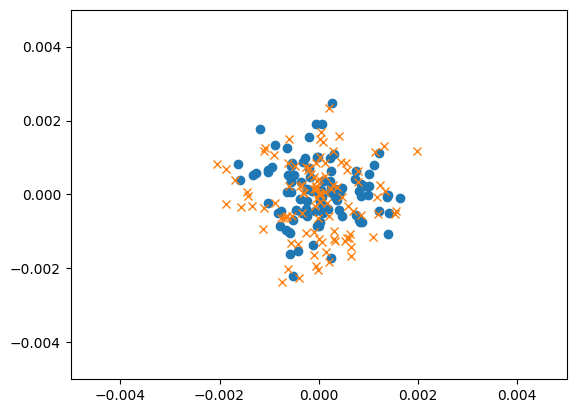

In [40]:
plt.figure()
plt.plot(particles.x,particles.y,'o')
plt.plot(tracked.monitor.x[:,-1],tracked.monitor.y[:,-1],'x')
plt.xlim(-0.005,0.005)
plt.ylim(-0.005,0.005)


In [26]:
particles.x[particles.particle_id]

array([-1.29552389e-04,  1.79706413e-05, -5.90822357e-04, -5.49768511e-04,
        5.82361954e-05,  1.01898980e-03,  9.14157266e-04,  2.33233630e-04,
       -2.78027378e-04,  1.10760261e-03,  1.40084609e-03, -4.17766972e-04,
       -4.56608200e-04, -6.46814624e-04, -6.13048127e-06, -9.37592220e-04,
        4.65975910e-04,  3.35545871e-04, -5.11036202e-04,  1.63473559e-03,
       -1.29134090e-05,  4.76098132e-04,  3.92136026e-04,  1.37242839e-03,
       -4.99337104e-04,  7.58943635e-04, -5.65430977e-04, -2.56408630e-04,
        8.66601670e-05,  3.88731546e-05,  6.14005814e-06, -2.31526829e-04,
        1.00202407e+00,  2.51917642e-04,  7.22420334e-04,  1.79185282e-04,
        1.01745384e-03, -1.03256846e-03,  8.10315701e-04, -5.49579637e-04,
       -5.11114897e-07, -1.21663138e-04, -2.41797546e-04, -2.45044731e-04,
        1.13300566e-04,  3.08796537e-04, -1.27025980e-03, -8.17568767e-04,
        8.04126160e-04,  1.22009305e-03,  3.26415749e-05,  2.40910753e-04,
        8.76719478e-04, -

In [25]:
particles.particle_id

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  32,  30,  31, 109,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  54,  50,  51,
        52,  53, 106,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  76, 105,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  97,  90,
        91,  92,  93,  94,  95,  96, 104, 103, 108, 100, 101, 102,  98,
        89,  75,  49,  29,  99, 107])

In [23]:
len(tracked.monitor.particle_id[:,-1])

110

In [18]:
tracked.monitor.x[:,-1]

array([ 2.97771863e-04,  1.68084493e-04,  3.99207222e-04,  2.98035256e-04,
       -3.88002403e-04, -3.39126393e-04, -1.56664568e-03, -1.34559873e-03,
       -9.08728326e-04, -1.87597679e-03, -5.87813961e-05,  8.87737202e-05,
        4.78427494e-04, -3.40010266e-04,  7.82842423e-04,  1.56697776e-03,
        7.86984978e-04,  1.23215657e-03, -1.07504948e-03, -1.43991318e-03,
       -4.18621834e-04, -5.99475632e-04, -6.40948117e-05, -1.68160246e-03,
       -3.17680067e-04, -2.11292981e-04,  1.12699927e-03, -1.10780239e-03,
       -1.43332148e-03,  0.00000000e+00,  1.16712170e-04,  1.25859845e-04,
       -4.16235364e-05,  5.65246495e-04, -6.63596042e-04, -8.77764122e-04,
       -7.54458696e-04,  1.18328645e-03,  5.74462470e-04,  1.97598793e-03,
       -5.11114894e-07,  3.68894293e-04, -2.04680215e-04,  5.59556813e-04,
       -6.31326412e-04,  8.43150445e-04,  1.19296316e-03,  1.33361071e-03,
       -1.87502356e-03,  0.00000000e+00,  5.31588103e-04,  5.98347955e-04,
       -5.51740841e-04, -

In [19]:
particles.x

array([-1.29552389e-04,  1.79706413e-05, -5.90822357e-04, -5.49768511e-04,
        5.82361954e-05,  1.01898980e-03,  9.14157266e-04,  2.33233630e-04,
       -2.78027378e-04,  1.10760261e-03,  1.40084609e-03, -4.17766972e-04,
       -4.56608200e-04, -6.46814624e-04, -6.13048127e-06, -9.37592220e-04,
        4.65975910e-04,  3.35545871e-04, -5.11036202e-04,  1.63473559e-03,
       -1.29134090e-05,  4.76098132e-04,  3.92136026e-04,  1.37242839e-03,
       -4.99337104e-04,  7.58943635e-04, -5.65430977e-04, -2.56408630e-04,
        8.66601670e-05, -3.34257294e-04,  6.14005814e-06, -2.31526829e-04,
        3.88731546e-05,  2.51917642e-04,  7.22420334e-04,  1.79185282e-04,
        1.01745384e-03, -1.03256846e-03,  8.10315701e-04, -5.49579637e-04,
       -5.11114897e-07, -1.21663138e-04, -2.41797546e-04, -2.45044731e-04,
        1.13300566e-04,  3.08796537e-04, -1.27025980e-03, -8.17568767e-04,
        8.04126160e-04,  2.54279315e-04,  3.26415749e-05,  2.40910753e-04,
        8.76719478e-04, -

In [193]:
# Saving results
#----------------------------------
# Preparing output folder
if not Path('zfruits').exists():
    Path('zfruits').mkdir()


# parquet_path = config['tracking']['tracking_path']

tracked.parquet_data = '_calculations'
parquet_path = 'zfruits/calculations'

bunch_ID     = str(bunch_number).zfill(4)
print(f'SAVING TO PARQUET... -> {parquet_path}')
# Setting Bunch number for partitionning
tracked.to_parquet(parquet_path,partition_name='BUNCH',partition_ID=bunch_ID)
#----------------------------------

SAVING TO PARQUET... -> zfruits/calculations


In [179]:
tracked.calculations

AttributeError: 'Tracking_Interface' object has no attribute 'calculation'

In [178]:
tracked.df

,Chunk ID,particle,state,start_at_turn,stop_at_turn,x_min,x_max,y_min,y_max,zeta_min,zeta_max,px_min,px_max,py_min,py_max,pzeta_min,pzeta_max
0,0,0,1,0,1,-5.111149e-07,-5.111149e-07,-4.858546e-08,-4.858546e-08,0.000001,0.000001,-7.613595e-09,-7.613595e-09,-7.992256e-10,-7.992256e-10,0.000001,0.000001
1,0,1,1,0,1,2.367101e-04,2.367101e-04,1.356989e-05,1.356989e-05,0.000003,0.000003,-5.205717e-07,-5.205717e-07,5.269593e-06,5.269593e-06,0.000001,0.000001
2,0,2,1,0,1,4.459553e-04,4.459553e-04,8.437466e-06,8.437466e-06,0.000006,0.000006,-2.957599e-06,-2.957599e-06,7.212497e-06,7.212497e-06,0.000001,0.000001
3,0,3,1,0,1,5.712725e-04,5.712725e-04,-5.294765e-05,-5.294765e-05,0.000011,0.000011,-1.116683e-05,-1.116683e-05,-8.270651e-07,-8.270651e-07,0.000001,0.000001
4,0,4,1,0,1,7.715696e-04,7.715696e-04,-3.129976e-05,-3.129976e-05,0.000012,0.000012,-1.041781e-05,-1.041781e-05,2.527062e-07,2.527062e-07,0.000001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,10,105,1,901,1000,-1.149700e-03,1.067084e-03,-1.995680e-03,2.009819e-03,-0.000096,-0.000033,-2.451944e-05,2.108670e-05,-2.457960e-05,2.428762e-05,0.000001,0.000001
1206,10,106,1,901,1000,-1.181519e-03,1.023301e-03,-1.693166e-03,1.714796e-03,-0.000097,-0.000046,-2.412647e-05,2.131555e-05,-2.204253e-05,2.279727e-05,0.000001,0.000001
1207,10,107,1,901,1000,-2.085796e-03,1.954277e-03,-1.857175e-03,1.670893e-03,-0.000180,-0.000084,-4.090310e-05,4.175804e-05,-2.164444e-05,2.509857e-05,0.000001,0.000001
1208,10,108,1,901,1000,-8.261566e-04,8.113149e-04,-2.056985e-03,1.920368e-03,-0.000089,-0.000051,-1.846109e-05,1.561771e-05,-2.522760e-05,2.460748e-05,0.000001,0.000001


In [175]:
tracked.calculation_buffer.to_pandas()

,Chunk ID,particle,state,start_at_turn,stop_at_turn,x_min,x_max,y_min,y_max,zeta_min,zeta_max,px_min,px_max,py_min,py_max,pzeta_min,pzeta_max
0,0,0,1,0,1,-5.111149e-07,-5.111149e-07,-4.858546e-08,-4.858546e-08,0.000001,0.000001,-7.613595e-09,-7.613595e-09,-7.992256e-10,-7.992256e-10,0.000001,0.000001
1,0,1,1,0,1,2.367101e-04,2.367101e-04,1.356989e-05,1.356989e-05,0.000003,0.000003,-5.205717e-07,-5.205717e-07,5.269593e-06,5.269593e-06,0.000001,0.000001
2,0,2,1,0,1,4.459553e-04,4.459553e-04,8.437466e-06,8.437466e-06,0.000006,0.000006,-2.957599e-06,-2.957599e-06,7.212497e-06,7.212497e-06,0.000001,0.000001
3,0,3,1,0,1,5.712725e-04,5.712725e-04,-5.294765e-05,-5.294765e-05,0.000011,0.000011,-1.116683e-05,-1.116683e-05,-8.270651e-07,-8.270651e-07,0.000001,0.000001
4,0,4,1,0,1,7.715696e-04,7.715696e-04,-3.129976e-05,-3.129976e-05,0.000012,0.000012,-1.041781e-05,-1.041781e-05,2.527062e-07,2.527062e-07,0.000001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,10,105,1,901,1000,-1.149700e-03,1.067084e-03,-1.995680e-03,2.009819e-03,-0.000096,-0.000033,-2.451944e-05,2.108670e-05,-2.457960e-05,2.428762e-05,0.000001,0.000001
1206,10,106,1,901,1000,-1.181519e-03,1.023301e-03,-1.693166e-03,1.714796e-03,-0.000097,-0.000046,-2.412647e-05,2.131555e-05,-2.204253e-05,2.279727e-05,0.000001,0.000001
1207,10,107,1,901,1000,-2.085796e-03,1.954277e-03,-1.857175e-03,1.670893e-03,-0.000180,-0.000084,-4.090310e-05,4.175804e-05,-2.164444e-05,2.509857e-05,0.000001,0.000001
1208,10,108,1,901,1000,-8.261566e-04,8.113149e-04,-2.056985e-03,1.920368e-03,-0.000089,-0.000051,-1.846109e-05,1.561771e-05,-2.522760e-05,2.460748e-05,0.000001,0.000001


In [195]:
def to_pandas(self):

    dct = {}
    for key,value in self.data.items():
        if key == 'n_parts':
            continue
        
        # print(key,len(np.shape(value)))
        if len(np.shape(value)) == 1:
            dct[key] = np.repeat(value,self.data['n_parts'])
        elif len(np.shape(value)) == 2:
            dct[key] = np.hstack(value)

    return pd.DataFrame(dct)


    

test = to_pandas(tracked.calculation_buffer)
test

,Chunk ID,particle,state,start_at_turn,stop_at_turn,x_min,x_max,y_min,y_max,zeta_min,zeta_max,px_min,px_max,py_min,py_max,pzeta_min,pzeta_max
0,0,0,1,0,1,0.000027,0.000027,0.000019,0.000019,4.020682e-07,4.020682e-07,0.000002,0.000002,3.326689e-06,3.326689e-06,0.000001,0.000001
1,0,1,1,0,1,0.000190,0.000190,-0.000018,-0.000018,4.522964e-06,4.522964e-06,-0.000004,-0.000004,-2.762212e-07,-2.762212e-07,0.000001,0.000001
2,0,2,1,0,1,0.000443,0.000443,-0.000022,-0.000022,7.829624e-06,7.829624e-06,-0.000007,-0.000007,6.649635e-06,6.649635e-06,0.000001,0.000001
3,0,3,1,0,1,0.000609,0.000609,-0.000028,-0.000028,1.006333e-05,1.006333e-05,-0.000009,-0.000009,3.609586e-06,3.609586e-06,0.000001,0.000001
4,0,4,1,0,1,0.000762,0.000762,-0.000071,-0.000071,1.445437e-05,1.445437e-05,-0.000015,-0.000015,-1.102487e-06,-1.102487e-06,0.000001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,10,105,1,901,1000,-0.000436,0.000468,-0.001341,0.001346,-4.520935e-05,-2.012666e-05,-0.000010,0.000009,-1.746144e-05,1.642146e-05,0.000001,0.000001
1206,10,106,1,901,1000,-0.000422,0.000382,-0.002298,0.002300,-1.062201e-04,-6.583081e-05,-0.000009,0.000007,-2.845137e-05,2.737465e-05,0.000001,0.000001
1207,10,107,1,901,1000,-0.000292,0.000248,-0.002107,0.002043,-7.652378e-05,-5.504162e-05,-0.000006,0.000005,-2.697271e-05,2.183952e-05,0.000001,0.000001
1208,10,108,1,901,1000,-0.002280,0.002098,-0.002331,0.002159,-2.335464e-04,-1.207689e-04,-0.000048,0.000045,-2.681924e-05,2.688155e-05,0.000001,0.000001


In [196]:
test

,Chunk ID,particle,state,start_at_turn,stop_at_turn,x_min,x_max,y_min,y_max,zeta_min,zeta_max,px_min,px_max,py_min,py_max,pzeta_min,pzeta_max
0,0,0,1,0,1,0.000027,0.000027,0.000019,0.000019,4.020682e-07,4.020682e-07,0.000002,0.000002,3.326689e-06,3.326689e-06,0.000001,0.000001
1,0,1,1,0,1,0.000190,0.000190,-0.000018,-0.000018,4.522964e-06,4.522964e-06,-0.000004,-0.000004,-2.762212e-07,-2.762212e-07,0.000001,0.000001
2,0,2,1,0,1,0.000443,0.000443,-0.000022,-0.000022,7.829624e-06,7.829624e-06,-0.000007,-0.000007,6.649635e-06,6.649635e-06,0.000001,0.000001
3,0,3,1,0,1,0.000609,0.000609,-0.000028,-0.000028,1.006333e-05,1.006333e-05,-0.000009,-0.000009,3.609586e-06,3.609586e-06,0.000001,0.000001
4,0,4,1,0,1,0.000762,0.000762,-0.000071,-0.000071,1.445437e-05,1.445437e-05,-0.000015,-0.000015,-1.102487e-06,-1.102487e-06,0.000001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,10,105,1,901,1000,-0.000436,0.000468,-0.001341,0.001346,-4.520935e-05,-2.012666e-05,-0.000010,0.000009,-1.746144e-05,1.642146e-05,0.000001,0.000001
1206,10,106,1,901,1000,-0.000422,0.000382,-0.002298,0.002300,-1.062201e-04,-6.583081e-05,-0.000009,0.000007,-2.845137e-05,2.737465e-05,0.000001,0.000001
1207,10,107,1,901,1000,-0.000292,0.000248,-0.002107,0.002043,-7.652378e-05,-5.504162e-05,-0.000006,0.000005,-2.697271e-05,2.183952e-05,0.000001,0.000001
1208,10,108,1,901,1000,-0.002280,0.002098,-0.002331,0.002159,-2.335464e-04,-1.207689e-04,-0.000048,0.000045,-2.681924e-05,2.688155e-05,0.000001,0.000001


In [197]:
tracked._calculations

,Chunk ID,particle,state,start_at_turn,stop_at_turn,x_min,x_max,y_min,y_max,zeta_min,zeta_max,px_min,px_max,py_min,py_max,pzeta_min,pzeta_max
0,0,0,1,0,1,0.000027,0.000027,0.000019,0.000019,4.020682e-07,4.020682e-07,0.000002,0.000002,3.326689e-06,3.326689e-06,0.000001,0.000001
1,0,1,1,0,1,0.000190,0.000190,-0.000018,-0.000018,4.522964e-06,4.522964e-06,-0.000004,-0.000004,-2.762212e-07,-2.762212e-07,0.000001,0.000001
2,0,2,1,0,1,0.000443,0.000443,-0.000022,-0.000022,7.829624e-06,7.829624e-06,-0.000007,-0.000007,6.649635e-06,6.649635e-06,0.000001,0.000001
3,0,3,1,0,1,0.000609,0.000609,-0.000028,-0.000028,1.006333e-05,1.006333e-05,-0.000009,-0.000009,3.609586e-06,3.609586e-06,0.000001,0.000001
4,0,4,1,0,1,0.000762,0.000762,-0.000071,-0.000071,1.445437e-05,1.445437e-05,-0.000015,-0.000015,-1.102487e-06,-1.102487e-06,0.000001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,10,105,1,901,1000,-0.000436,0.000468,-0.001341,0.001346,-4.520935e-05,-2.012666e-05,-0.000010,0.000009,-1.746144e-05,1.642146e-05,0.000001,0.000001
1206,10,106,1,901,1000,-0.000422,0.000382,-0.002298,0.002300,-1.062201e-04,-6.583081e-05,-0.000009,0.000007,-2.845137e-05,2.737465e-05,0.000001,0.000001
1207,10,107,1,901,1000,-0.000292,0.000248,-0.002107,0.002043,-7.652378e-05,-5.504162e-05,-0.000006,0.000005,-2.697271e-05,2.183952e-05,0.000001,0.000001
1208,10,108,1,901,1000,-0.002280,0.002098,-0.002331,0.002159,-2.335464e-04,-1.207689e-04,-0.000048,0.000045,-2.681924e-05,2.688155e-05,0.000001,0.000001


In [170]:
test.groupby('start_at_turn').get_group(901).groupby('particle').count()

,Chunk ID,start_at_turn,stop_at_turn,x_min,x_max,y_min,y_max,zeta_min,zeta_max,px_min,px_max,py_min,py_max,pzeta_min,pzeta_max
particle,,,,,,,,,,,,,,,
0,7,7,7,7,7,7,7,7,7,7,7,7,7,1,1
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
105,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
106,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [171]:
tracked.monitor.state

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0]])

In [96]:
self = tracked
test = xt.ParticlesMonitor( _context         = self.context,
                                                start_at_turn    = 0, 
                                                stop_at_turn     = 10,
                                                num_particles    = self.n_parts)

In [98]:
test.x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

SyntaxError: invalid syntax (2831685339.py, line 1)

In [111]:
xt.ParticlesMonitor( _context         = self.context,
                                                start_at_turn    = 0, 
                                                stop_at_turn     = 10,
                                                num_particles    = 3).to_dict()

{'__class__': 'ParticlesMonitor',
 'start_at_turn': 0,
 'stop_at_turn': 10,
 'part_id_start': 0,
 'part_id_end': 3,
 'ebe_mode': 0,
 'n_records': 30,
 'n_repetitions': 1,
 'repetition_period': -1,
 'flag_auto_to_numpy': 1,
 'data': {'start_tracking_at_element': 0,
  'q0': 0.0,
  'mass0': 0.0,
  's': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'zeta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'chi': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'charge_ratio': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
  'weight': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0.

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [120]:
rich.inspect(dummy['data'])

╭────────────────────────────────────────── <class 'dict'> ──────────────────────────────────────────╮
│ dict() -> new empty dictionary                                                                     │
│ dict(mapping) -> new dictionary initialized from a mapping object's                                │
│     (key, value) pairs                                                                             │
│ dict(iterable) -> new dictionary initialized as if via:                                            │
│     d = {}                                                                                         │
│     for k, v in iterable:                                                                          │
│         d[k] = v                                                                                   │
│ dict(**kwargs) -> new dictionary initialized with the name=value pairs                             │
│     in the keyword argument list.  For example:  dict(one=1, two=2)                                │
│                                                                                                    │
│ ╭────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ {                                                                                              │ │
│ │ │   'start_tracking_at_element': 0,                                                            │ │
│ │ │   'q0': 0.0,                                                                                 │ │
│ │ │   'mass0': 0.0,                                                                              │ │
│ │ │   's': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,            │ │
│ │ │      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),                                   │ │
│ │ │   'zeta': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,         │ │
│ │ │      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),                                   │ │
│ │ │   'chi': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,          │ │
│ │ │      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),                                   │ │
│ │ │   'charge_ratio': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., │ │
│ │ │      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),                                   │ │
│ │ │   'weight': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,       │ │
│ │ │      0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),                                   │ │
│ │ │   'particle_id': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,    │ │
│ │ │      0, 0, 0, 0, 0, 0, 0, 0]),                                                               │ │
│ │ │   'at_element': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,     │ │
│ │ │      0, 0, 0, 0, 0, 0, 0, 0]),                                                               │ │
│ │ │   ... +18                                                                                    │ │
│ │ }                                                                                              │ │
│ ╰────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                    │
│ 35 attribute(s) not shown. Run inspect(inspect) for options.                                       │
╰────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [135]:
class MYParticles(xp.ParticlesBase):

    _cname = 'ParticlesData'

    size_vars = xp.ParticlesBase.size_vars
    scalar_vars = xp.ParticlesBase.scalar_vars
    per_particle_vars = xp.ParticlesBase.per_particle_vars + \
                        ((xo.Float64, 'x'),
                         (xo.Float64, 'y'),
                         (xo.Float64, 'px'),
                         (xo.Float64, 'py'))

    _xofields = {
        **{nn: tt for tt, nn in size_vars + scalar_vars},
        **{nn: tt[:] for tt, nn in per_particle_vars},
    }


test = MYParticles()

In [ ]:
xt.BeamElement


In [158]:
class Calculation_record(xo.Struct):
    count = xo.Float64[:]
    x_sum = xo.Float64[:]
    # x2_sum = xo.Float64[:]
    # y_sum = xo.Float64[:]
    # y2_sum = xo.Float64[:]

class BeamSizeMonitor(xt.BeamElement):

    _xofields={
        'num_particles': xo.Int64,
        'start_at_turn': xo.Int64,
        'stop_at_turn': xo.Int64,
        'data': Calculation_record,
    }


test = BeamSizeMonitor(start_at_turn    = 0, 
                stop_at_turn     = 10,
                num_particles    = 3,
                data = {'count':[1,2,3],'x_sum':np.array([1.,2.,3.])})

In [163]:
BeamSizeMonitor.from_dict({'data': {'count':[1,2,3],'x_sum':np.array([1.,2.,3.])}}).to_dict()

{'__class__': 'BeamSizeMonitor',
 'num_particles': 0,
 'start_at_turn': 0,
 'stop_at_turn': 0,
 'data': {'count': <ArrNFloat64[3] at 48>, 'x_sum': <ArrNFloat64[3] at 88>}}

In [151]:
# Calculation_record({'count':[1,2,3]})

AttributeError: 'Calculation_record' object has no attribute 'to_dict'

In [136]:
dummy = xt.ParticlesMonitor( _context         = self.context,
                                                start_at_turn    = 0, 
                                                stop_at_turn     = 10,
                                                num_particles    = 3).to_dict()

# dummy['data'] = {'x':dummy['data']['x']}
# dummy['data'].pop('start_tracking_at_element')
# dummy['data'].pop('_rng_s1')
dummy['data'] = test.to_dict()
dummy['data']['test'] = [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
mymon = xt.ParticlesMonitor.from_dict(dummy)

In [140]:
dummy['data']['test']

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [142]:
mymon.to_dict()['data']

{'start_tracking_at_element': -1,
 'q0': 1.0,
 'mass0': 938272088.1604904,
 's': array([0.]),
 'zeta': array([0.]),
 'chi': array([1.]),
 'charge_ratio': array([1.]),
 'weight': array([1.]),
 'particle_id': array([0]),
 'at_element': array([0]),
 'at_turn': array([0]),
 'state': array([1]),
 'parent_particle_id': array([0]),
 '_rng_s1': array([0], dtype=uint32),
 '_rng_s2': array([0], dtype=uint32),
 '_rng_s3': array([0], dtype=uint32),
 '_rng_s4': array([0], dtype=uint32),
 'x': array([-9.99999999e+08]),
 'y': array([-9.99999999e+08]),
 'px': array([-9.99999999e+08]),
 'py': array([-9.99999999e+08]),
 'delta': LinkedArrayCpu([0.]),
 'ptau': LinkedArrayCpu([-2.22044605e-16]),
 'rvv': LinkedArrayCpu([1.]),
 'rpp': LinkedArrayCpu([1.]),
 'p0c': array([1.e+09]),
 'beta0': array([0.7292562]),
 'gamma0': array([1.46147392])}

In [102]:
test.to_dict()['data']

{'start_tracking_at_element': 0,
 'q0': 0.0,
 'mass0': 0.0,
 's': array([0., 0., 0., 0., 0., 0.]),
 'zeta': array([0., 0., 0., 0., 0., 0.]),
 'chi': array([0., 0., 0., 0., 0., 0.]),
 'charge_ratio': array([0., 0., 0., 0., 0., 0.]),
 'weight': array([0., 0., 0., 0., 0., 0.]),
 'particle_id': array([0, 0, 0, 0, 0, 0]),
 'at_element': array([0, 0, 0, 0, 0, 0]),
 'at_turn': array([0, 0, 0, 0, 0, 0]),
 'state': array([0, 0, 0, 0, 0, 0]),
 'parent_particle_id': array([0, 0, 0, 0, 0, 0]),
 '_rng_s1': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 '_rng_s2': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 '_rng_s3': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 '_rng_s4': array([0, 0, 0, 0, 0, 0], dtype=uint32),
 'x': array([0., 0., 0., 0., 0., 0.]),
 'y': array([0., 0., 0., 0., 0., 0.]),
 'px': array([0., 0., 0., 0., 0., 0.]),
 'py': array([0., 0., 0., 0., 0., 0.]),
 'delta': LinkedArrayCpu([0., 0., 0., 0., 0., 0.]),
 'ptau': LinkedArrayCpu([0., 0., 0., 0., 0., 0.]),
 'rvv': LinkedArrayCpu([0., 0., 0., 0., 

In [93]:
test.to_dict()

{'__class__': 'ParticlesMonitor',
 'start_at_turn': 901,
 'stop_at_turn': 1000,
 'part_id_start': 0,
 'part_id_end': 110,
 'ebe_mode': 0,
 'n_records': 10890,
 'n_repetitions': 1,
 'repetition_period': 1,
 'flag_auto_to_numpy': 1,
 'data': {'start_tracking_at_element': 0,
  'q0': 0.0,
  'mass0': 0.0,
  's': array([0., 0., 0., ..., 0., 0., 0.]),
  'zeta': array([1.21245533e-06, 1.21245450e-06, 1.21245367e-06, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]),
  'chi': array([1., 1., 1., ..., 0., 0., 0.]),
  'charge_ratio': array([1., 1., 1., ..., 0., 0., 0.]),
  'weight': array([0., 0., 0., ..., 0., 0., 0.]),
  'particle_id': array([0, 0, 0, ..., 0, 0, 0]),
  'at_element': array([0, 0, 0, ..., 0, 0, 0]),
  'at_turn': array([901, 902, 903, ...,   0,   0,   0]),
  'state': array([1, 1, 1, ..., 0, 0, 0]),
  'parent_particle_id': array([0, 0, 0, ..., 0, 0, 0]),
  '_rng_s1': array([0, 0, 0, ..., 0, 0, 0], dtype=uint32),
  '_rng_s2': array([0, 0, 0, ..., 0, 0, 0], dtype=uint32),


In [92]:
pd.DataFrame(test.to_dict()['data'])

,start_tracking_at_element,q0,mass0,s,zeta,chi,charge_ratio,weight,particle_id,at_element,...,y,px,py,delta,ptau,rvv,rpp,p0c,beta0,gamma0
0,0,0.0,0.0,0.0,0.000001,1.0,1.0,0.0,0,0,...,-4.858544e-08,-7.613596e-09,-7.992254e-10,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
1,0,0.0,0.0,0.0,0.000001,1.0,1.0,0.0,0,0,...,-4.858547e-08,-7.613595e-09,-7.992258e-10,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
2,0,0.0,0.0,0.0,0.000001,1.0,1.0,0.0,0,0,...,-4.858547e-08,-7.613596e-09,-7.992256e-10,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
3,0,0.0,0.0,0.0,0.000001,1.0,1.0,0.0,0,0,...,-4.858544e-08,-7.613596e-09,-7.992253e-10,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
4,0,0.0,0.0,0.0,0.000001,1.0,1.0,0.0,0,0,...,-4.858546e-08,-7.613595e-09,-7.992258e-10,0.000001,0.000001,1.0,0.999999,6.800000e+12,1.0,7247.364689
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10885,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000
10886,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000
10887,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000
10888,0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0,0,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.0,0.000000


In [88]:
xPlus.whereis(tracked.monitor)

context=ContextCpu, buffer=0, offset=0


In [207]:
tracked.df

,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,901,0,-0.000235,5.473596e-06,5.192655e-04,0.000004,-0.000013,0.000001,1,0
1,902,0,0.000187,-2.161282e-06,-6.340114e-04,-0.000009,-0.000006,0.000001,1,0
2,903,0,0.000107,-4.111531e-06,-7.493580e-07,0.000003,-0.000006,0.000001,1,0
3,904,0,-0.000280,5.207527e-06,6.303443e-04,0.000006,-0.000014,0.000001,1,0
4,905,0,0.000071,8.087746e-07,-5.267305e-04,-0.000008,-0.000009,0.000001,1,0
...,...,...,...,...,...,...,...,...,...,...
9895,995,108,-0.000373,2.408094e-05,-9.836826e-04,-0.000015,-0.000173,0.000001,1,0
9896,996,108,0.001974,-4.239549e-05,-2.404598e-04,0.000003,-0.000121,0.000001,1,0
9897,997,108,-0.001197,1.033646e-05,1.174049e-03,0.000012,-0.000169,0.000001,1,0
9898,998,108,-0.001047,3.341196e-05,-4.733389e-04,-0.000010,-0.000180,0.000001,1,0


In [206]:
test

,Chunk ID,particle,state,start_at_turn,stop_at_turn,x_min,x_max,y_min,y_max,zeta_min,zeta_max,px_min,px_max,py_min,py_max,pzeta_min,pzeta_max
0,0,0,1,0,1,0.000027,0.000027,0.000019,0.000019,4.020682e-07,4.020682e-07,0.000002,0.000002,3.326689e-06,3.326689e-06,0.000001,0.000001
1,0,1,1,0,1,0.000190,0.000190,-0.000018,-0.000018,4.522964e-06,4.522964e-06,-0.000004,-0.000004,-2.762212e-07,-2.762212e-07,0.000001,0.000001
2,0,2,1,0,1,0.000443,0.000443,-0.000022,-0.000022,7.829624e-06,7.829624e-06,-0.000007,-0.000007,6.649635e-06,6.649635e-06,0.000001,0.000001
3,0,3,1,0,1,0.000609,0.000609,-0.000028,-0.000028,1.006333e-05,1.006333e-05,-0.000009,-0.000009,3.609586e-06,3.609586e-06,0.000001,0.000001
4,0,4,1,0,1,0.000762,0.000762,-0.000071,-0.000071,1.445437e-05,1.445437e-05,-0.000015,-0.000015,-1.102487e-06,-1.102487e-06,0.000001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1205,10,105,1,901,1000,-0.000436,0.000468,-0.001341,0.001346,-4.520935e-05,-2.012666e-05,-0.000010,0.000009,-1.746144e-05,1.642146e-05,0.000001,0.000001
1206,10,106,1,901,1000,-0.000422,0.000382,-0.002298,0.002300,-1.062201e-04,-6.583081e-05,-0.000009,0.000007,-2.845137e-05,2.737465e-05,0.000001,0.000001
1207,10,107,1,901,1000,-0.000292,0.000248,-0.002107,0.002043,-7.652378e-05,-5.504162e-05,-0.000006,0.000005,-2.697271e-05,2.183952e-05,0.000001,0.000001
1208,10,108,1,901,1000,-0.002280,0.002098,-0.002331,0.002159,-2.335464e-04,-1.207689e-04,-0.000048,0.000045,-2.681924e-05,2.688155e-05,0.000001,0.000001


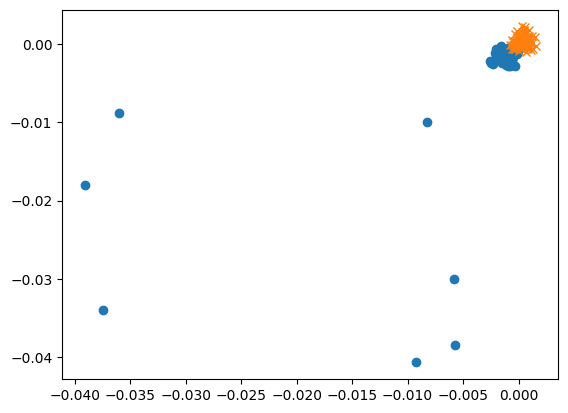

In [8]:
import matplotlib.pyplot as plt
plt.figure()
at_turn = 1
_df = tracked.calculations.groupby('start_at_turn').get_group(at_turn)
plt.plot(_df.x_min,_df.y_min,'o')

_df = tracked.df.groupby('turn').get_group(at_turn)
plt.plot(_df.x,_df.y,'x')

In [2]:
tracked.calculations

,Chunk ID,particle,state,start_at_turn,stop_at_turn,x_min,x_max,y_min,y_max,zeta_min,zeta_max,px_min,px_max,py_min,py_max,pzeta_min,pzeta_max
0,0,0,1,0,1,0.000014,0.000014,0.000019,0.000019,1.860824e-07,1.860824e-07,0.000002,0.000002,1.818281e-06,1.818281e-06,0.000001,0.000001
1,0,1,1,0,1,0.000200,0.000200,-0.000013,-0.000013,4.385888e-06,4.385888e-06,-0.000003,-0.000003,8.928601e-07,8.928601e-07,0.000001,0.000001
2,0,2,1,0,1,0.000450,0.000450,-0.000006,-0.000006,6.873899e-06,6.873899e-06,-0.000005,-0.000005,7.631926e-06,7.631926e-06,0.000001,0.000001
3,0,3,1,0,1,0.000623,0.000623,-0.000042,-0.000042,1.114073e-05,1.114073e-05,-0.000010,-0.000010,5.174000e-06,5.174000e-06,0.000001,0.000001
4,0,4,1,0,1,0.000835,0.000835,-0.000071,-0.000071,1.540513e-05,1.540513e-05,-0.000016,-0.000016,7.310054e-06,7.310054e-06,0.000001,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
215,1,105,1,1,1000,-0.000566,0.000484,-0.002139,0.002079,-8.268676e-05,8.367450e-05,-0.000012,0.000010,-2.732182e-05,2.394092e-05,0.000001,0.000001
216,1,106,1,1,1000,-0.001900,0.001775,-0.001854,0.001900,-1.400723e-04,1.447825e-04,-0.000036,0.000039,-2.181863e-05,2.446972e-05,0.000001,0.000001
217,1,0,0,1,1000,-0.005807,0.005311,-0.030050,0.010599,-5.107745e-06,1.590052e-03,-0.000098,0.000118,-5.186070e-04,2.332428e-04,NaN,NaN
218,1,108,1,1,1000,-0.000546,0.000452,-0.002224,0.002185,-8.740345e-05,9.058855e-05,-0.000011,0.000010,-2.792270e-05,2.535351e-05,0.000001,0.000001


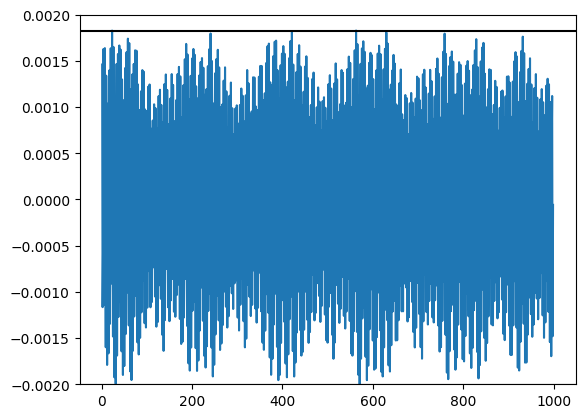

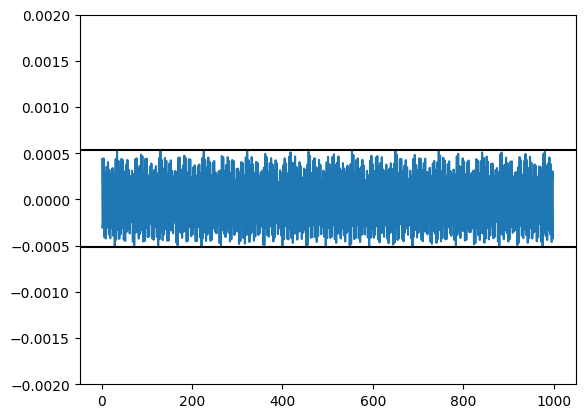

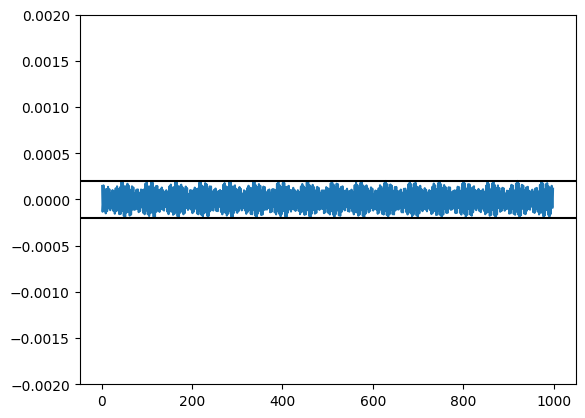

In [10]:
import matplotlib.pyplot as plt
test = tracked.calculations
for part in [10,20,30]:
    plt.figure()
    plt.plot(tracked.df.groupby('particle').get_group(part).turn,tracked.df.groupby('particle').get_group(part).x,'-')
    plt.axhline(test.groupby('start_at_turn').get_group(1).iloc[part].x_min,color='k')
    plt.axhline(test.groupby('start_at_turn').get_group(1).iloc[part].x_max,color='k')
    plt.ylim([-0.002,0.002])

In [4]:
test.groupby('particle').get_group(0)

,Chunk ID,particle,state,start_at_turn,stop_at_turn,x_min,x_max,y_min,y_max,zeta_min,zeta_max,px_min,px_max,py_min,py_max,pzeta_min,pzeta_max
0,0,0,1,0,1,0.000037,0.000037,0.000025,0.000025,1.319259e-07,1.319259e-07,0.000003,0.000003,0.000004,0.000004,0.000001,0.000001
110,1,0,1,1,101,-0.000416,0.000428,-0.000903,0.000923,-4.151207e-06,2.492949e-05,-0.000009,0.000009,-0.000012,0.000012,0.000001,0.000001
220,2,0,1,101,201,-0.000421,0.000428,-0.000902,0.000908,9.455755e-06,2.871419e-05,-0.000009,0.000009,-0.000012,0.000012,0.000001,0.000001
298,2,0,0,101,201,-0.004574,0.008395,-0.014276,0.051183,0.000000e+00,2.184209e-03,-0.000149,0.000103,-0.000202,0.000499,NaN,NaN
318,2,0,0,101,201,-0.005935,0.004202,-0.091716,0.043344,0.000000e+00,4.065706e-03,-0.000089,0.000204,-0.001425,0.000668,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1178,10,0,0,901,1000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1189,10,0,0,901,1000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1198,10,0,0,901,1000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN
1207,10,0,0,901,1000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,NaN,NaN


array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,   0,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,   0,  70,  71,  72,  73,  74,  75,  76,  77,
        78,   0,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,   0,   0, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109])

In [77]:
np.shape(tracked.monitor.particle_id[:,0])

(110,)

In [69]:
test.groupby('start_at_turn').get_group(901).iloc[0].x_min

-0.0003938522615139792

In [63]:
tracked.df.groupby('particle').get_group(0)

,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,901,0,0.000282,-5.605241e-06,0.000966,0.000018,-0.000055,0.000001,1,0
1,902,0,-0.000100,-2.038909e-07,0.000765,0.000002,-0.000061,0.000001,1,0
2,903,0,-0.000208,5.612989e-06,-0.001709,-0.000020,-0.000065,0.000001,1,0
3,904,0,0.000266,-4.289340e-06,0.000793,0.000016,-0.000057,0.000001,1,0
4,905,0,0.000059,-3.336141e-06,0.000989,0.000004,-0.000060,0.000001,1,0
...,...,...,...,...,...,...,...,...,...,...
94,995,0,-0.000229,3.716906e-06,-0.001575,-0.000016,-0.000054,0.000001,1,0
95,996,0,-0.000006,1.889509e-06,0.001152,0.000019,-0.000051,0.000001,1,0
96,997,0,0.000214,-4.816451e-06,0.000555,-0.000001,-0.000046,0.000001,1,0
97,998,0,-0.000153,1.568013e-06,-0.001668,-0.000018,-0.000052,0.000001,1,0


In [55]:
tracked.calculation_buffer.data['n_parts']

np.shape(np.repeat(tracked.calculation_buffer.data['start_at_turn'],tracked.calculation_buffer.data['n_parts']))


(1210,)

In [38]:
np.shape(np.hstack(tracked.calculation_buffer.data['x_min']))

(1210,)

In [45]:
np.hstack(tracked.calculation_buffer.data['x_min'])

array([-5.11114889e-07,  2.69713946e-04,  4.27304613e-04, ...,
       -2.94370033e-04, -5.04925492e-04,  0.00000000e+00])

110

In [36]:
np.shape(tracked.monitor.x)

(110, 99)

In [32]:

dimension = 



tracked.calculation_buffer.data

{'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 'start_at_turn': [0, 1, 101, 201, 301, 401, 501, 601, 701, 801, 901],
 'stop_at_turn': [1, 101, 201, 301, 401, 501, 601, 701, 801, 901, 1000],
 'x_min': [array([-5.11114889e-07,  2.69713946e-04,  4.27304613e-04,  6.40949221e-04,
          7.80322451e-04,  9.92276867e-04,  1.22575380e-03,  1.38533673e-03,
          1.58952254e-03,  1.76460886e-03,  4.22523112e-05,  1.98971969e-04,
          3.86272778e-04,  6.19176519e-04,  7.89722397e-04,  9.60101180e-04,
          1.14043542e-03,  1.35323251e-03,  1.52075093e-03,  1.72086250e-03,
          1.93965141e-05,  1.99262810e-04,  4.32362549e-04,  5.73610809e-04,
          8.14246116e-04,  9.32868409e-04,  1.10972080e-03,  1.31093040e-03,
          1.49459935e-03,  1.67793477e-03,  2.85965986e-05,  1.93502823e-04,
          3.91564272e-04,  5.54087684e-04,  7.93976864e-04,  8.76305299e-04,
          1.10347293e-03,  1.23736907e-03,  1.40239515e-03,  1.59996030e-03,
         -5.11114889e-07,  1.94

In [31]:


%%timeit



np.shape(np.vstack(tracked.calculation_buffer.data['x_min']).flatten())


6.34 µs ± 17 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [24]:
pd.DataFrame([tracked.monitor.at_turn,tracked.calculation_buffer.data['x_min']])

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [17]:
tracked.monitor.to_dict()['data']['at_turn']

array([901, 902, 903, ...,   0,   0,   0])

In [27]:
tracked.monitor.to_dict

<bound method HybridClass.to_dict of ParticlesMonitor(start_at_turn=901, stop_at_turn=1000, part_id_start=0, part_id_end=110, ebe_mode=0, n_records=10890, n_repetitions=1, repetition_period=1, flag_auto_to_numpy=1, data=Particles(_capacity=0, _num_active_particles=0, _num_lost_particles=0, start_tracking_at_element=0, q0=0.0, mass0=0.0, _p0c=[6.79999994e+12 6.79999994e+12 6.79999994e+12 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00], _gamma0=[7247.36468857 7247.36468857 7247.36468857 ...    0.            0.
    0.        ], _beta0=[0.99999999 0.99999999 0.99999999 ... 0.         0.         0.        ], s=[0. 0. 0. ... 0. 0. 0.], zeta=[-4.88300256e-05 -6.07773805e-05 -9.72307819e-05 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00], _ptau=[1.15897927e-06 1.15813515e-06 1.15697831e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00], _delta=[1.15897928e-06 1.15813516e-06 1.15697832e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00], _rpp=[0.99999884 0.99999884 0.99999884 ..

In [21]:
class DataStructure(xo.Struct):
    a = xo.Float64[:]
    b = xo.Float64[:]
    c = xo.Float64[:]
    s = xo.Float64

obj = DataStructure(_context=context,
                    a=[1,2,3], b=[4,5,6],
                    c=[0,0,0], s=0)


class Outer(xo.HybridClass):
    _xofields = {
        'a': 2
    }

In [25]:
obj.to_dict()

AttributeError: 'DataStructure' object has no attribute 'to_dict'

In [12]:
import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp
import xobjects as xo


# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')
sys.path.append('/home/phbelang/abp/BBStudies')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst

# JOB imports
import importlib
sys.path.append('../../')
main_002 = importlib.import_module('Jobs.002_user_specific_tasks.main')
main = importlib.import_module('Jobs.003_particle_dist_and_track.main')
user_specific_tasks = main_002.user_specific_tasks


config_bb = main.read_configuration('../001_configure_collider/config.yaml')

In [19]:
sequence = 'lhcb1'

In [21]:

beam

'b1'

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
import gc


# xsuite
import xtrack as xt
import xmask as xm
import xfields as xf
import xpart as xp
import xobjects as xo


# BBStudies
import sys
sys.path.append('/Users/pbelanger/ABPLocal/BBStudies')
sys.path.append('/home/phbelang/abp/BBStudies')
import BBStudies.Tracking.XsuitePlus as xPlus
import BBStudies.Tracking.InteractionPoint as inp
import BBStudies.Physics.Detuning as tune
import BBStudies.Plotting.BBPlots as bbplt
import BBStudies.Physics.Base as phys
import BBStudies.Physics.Constants as cst


test = xPlus.Tracking_Interface.from_parquet('zfruits/tracking',partition_name='BUNCH',partition_ID='0224')

In [8]:
test.df_sig.groupby('turn').get_group(0).x_sig.max()

10.000000047597021

(0.3, 0.35)

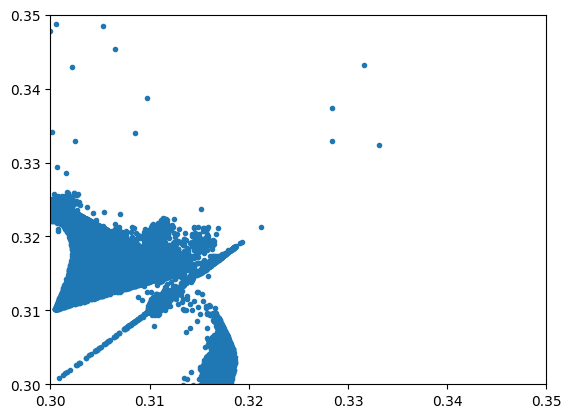

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(test.tunes.Qx,test.tunes.Qy,'.')
plt.xlim([0.3,0.35])
plt.ylim([0.3,0.35])

In [8]:
data_path = 'zfruits/test_tracked'
partition_name = 'BUNCH'
partition_ID = '0001'

meta_path = f'{data_path}/{partition_name}={partition_ID}/meta_data.json'

import json
with open(meta_path , "r") as file: 
    metadata = json.load(file)

Particles(_capacity=1, _num_active_particles=1, _num_lost_particles=0, start_tracking_at_element=-1, q0=1.0, mass0=938272088.16, _p0c=[6.79999994e+12], _gamma0=[7247.36468857], _beta0=[0.99999999], s=[0.], zeta=[1.21249509e-06], _ptau=[1.02868299e-06], _delta=[1.028683e-06], _rpp=[0.99999897], _rvv=[1.], chi=[1.], charge_ratio=[1.], weight=[1.], particle_id=[0], at_element=[0], at_turn=[0], state=[1], parent_particle_id=[0], _rng_s1=[0], _rng_s2=[0], _rng_s3=[0], _rng_s4=[0], x=[-5.11114889e-07], y=[-4.85854601e-08], px=[-7.61359513e-09], py=[-7.99225605e-10])

In [10]:
xp.Particles.from(metadata['particle_on_co'])

TypeError: '<=' not supported between instances of 'dict' and 'int'

In [5]:
tracked.df.x.values

NameError: name 'tracked' is not defined

In [2]:
tracked.to_parquet('zfruits/test_tracked',partition_name='BUNCH',partition_ID='0002')

In [3]:
tracked.to_parquet('zfruits/test_tracked',partition_name='BUNCH',partition_ID='0003')

In [5]:
import dask.dataframe as dd

In [50]:
def from_parquet(data_path,partition_name=None,partition_ID=None,variables = None):

    # Checking input
    #-----------------------------
    if variables is not None:
        if partition_name not in variables:
            variables = [partition_name] + variables
    #-----------------------------

    # Importing the data
    #-----------------------------
    if partition_ID is not None:
        assert (partition_name is None) == (partition_ID is None), 'partition_name and partition_ID must be both None or both not None'
        _partition = dd.read_parquet(data_path + f'/{partition_name}={partition_ID}',columns=variables,parquet_file_extension = '.parquet')
    else:
        _partition = dd.read_parquet(data_path,columns=variables,parquet_file_extension = '.parquet')
    #-----------------------------

    # Cleaning up the dataframe
    #-----------------------------
    df        = _partition.compute()
    if partition_name is not None:
        df = df.set_index(partition_name).reset_index()
    else:
        df = df.reset_index(drop=True)
    #-----------------------------


    # Removing raw data
    #-----------------------------
    del(_partition)
    gc.collect()
    #-----------------------------



    return df

test = from_parquet('zfruits/test_tracked',partition_name='BUNCH')

In [53]:
reloaded

NameError: name 'reloaded' is not defined

In [52]:
test

,BUNCH,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,1,0,0,0.000006,1.229042e-06,0.000011,7.739519e-07,5.952758e-07,0.000001,1,ip3
1,1,1,0,0.000151,-3.436815e-06,0.000121,1.124714e-06,4.110729e-06,0.000001,1,ip3
2,1,2,0,-0.000102,9.330492e-07,-0.000103,-1.627083e-06,2.949315e-08,0.000001,1,ip3
3,1,3,0,-0.000086,2.807211e-06,-0.000044,1.060294e-07,-8.483520e-07,0.000001,1,ip3
4,1,4,0,0.000156,-2.745100e-06,0.000137,1.571586e-06,3.820113e-06,0.000001,1,ip3
...,...,...,...,...,...,...,...,...,...,...,...
316216,3,248,109,-0.004174,5.970869e-05,0.006922,1.455801e-05,7.053739e-04,0.000002,1,ip3
316217,3,249,109,-0.007379,1.511604e-04,0.008082,2.311698e-04,7.434659e-04,0.000002,1,ip3
316218,3,250,109,-0.012812,2.960926e-04,-0.003981,8.160388e-05,9.900876e-04,0.000002,1,ip3
316219,3,251,109,0.007797,-1.535488e-05,0.007299,-7.752812e-05,1.862012e-03,0.000002,1,ip3


In [31]:
test.reset_index(drop=True)

,turn,particle,x,px,y,py,zeta,pzeta,state,at_element,BUNCH
0,0,0,0.000006,1.229042e-06,0.000011,7.739519e-07,5.952758e-07,0.000001,1,ip3,1
1,1,0,0.000151,-3.436815e-06,0.000121,1.124714e-06,4.110729e-06,0.000001,1,ip3,1
2,2,0,-0.000102,9.330492e-07,-0.000103,-1.627083e-06,2.949315e-08,0.000001,1,ip3,1
3,3,0,-0.000086,2.807211e-06,-0.000044,1.060294e-07,-8.483520e-07,0.000001,1,ip3,1
4,4,0,0.000156,-2.745100e-06,0.000137,1.571586e-06,3.820113e-06,0.000001,1,ip3,1
...,...,...,...,...,...,...,...,...,...,...,...
316216,248,109,-0.004174,5.970869e-05,0.006922,1.455801e-05,7.053739e-04,0.000002,1,ip3,3
316217,249,109,-0.007379,1.511604e-04,0.008082,2.311698e-04,7.434659e-04,0.000002,1,ip3,3
316218,250,109,-0.012812,2.960926e-04,-0.003981,8.160388e-05,9.900876e-04,0.000002,1,ip3,3
316219,251,109,0.007797,-1.535488e-05,0.007299,-7.752812e-05,1.862012e-03,0.000002,1,ip3,3


In [24]:
test.reset_index(drop=True).set_index('BUNCH').reset_index()

,BUNCH,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,1,0,0,0.000006,1.229042e-06,0.000011,7.739519e-07,5.952758e-07,0.000001,1,ip3
1,1,1,0,0.000151,-3.436815e-06,0.000121,1.124714e-06,4.110729e-06,0.000001,1,ip3
2,1,2,0,-0.000102,9.330492e-07,-0.000103,-1.627083e-06,2.949315e-08,0.000001,1,ip3
3,1,3,0,-0.000086,2.807211e-06,-0.000044,1.060294e-07,-8.483520e-07,0.000001,1,ip3
4,1,4,0,0.000156,-2.745100e-06,0.000137,1.571586e-06,3.820113e-06,0.000001,1,ip3
...,...,...,...,...,...,...,...,...,...,...,...
316216,3,248,109,-0.004174,5.970869e-05,0.006922,1.455801e-05,7.053739e-04,0.000002,1,ip3
316217,3,249,109,-0.007379,1.511604e-04,0.008082,2.311698e-04,7.434659e-04,0.000002,1,ip3
316218,3,250,109,-0.012812,2.960926e-04,-0.003981,8.160388e-05,9.900876e-04,0.000002,1,ip3
316219,3,251,109,0.007797,-1.535488e-05,0.007299,-7.752812e-05,1.862012e-03,0.000002,1,ip3


In [23]:
test.set_index('BUNCH').reset_index()

,BUNCH,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,1,0,0,0.000006,1.229042e-06,0.000011,7.739519e-07,5.952758e-07,0.000001,1,ip3
1,1,1,0,0.000151,-3.436815e-06,0.000121,1.124714e-06,4.110729e-06,0.000001,1,ip3
2,1,2,0,-0.000102,9.330492e-07,-0.000103,-1.627083e-06,2.949315e-08,0.000001,1,ip3
3,1,3,0,-0.000086,2.807211e-06,-0.000044,1.060294e-07,-8.483520e-07,0.000001,1,ip3
4,1,4,0,0.000156,-2.745100e-06,0.000137,1.571586e-06,3.820113e-06,0.000001,1,ip3
...,...,...,...,...,...,...,...,...,...,...,...
316216,3,248,109,-0.004174,5.970869e-05,0.006922,1.455801e-05,7.053739e-04,0.000002,1,ip3
316217,3,249,109,-0.007379,1.511604e-04,0.008082,2.311698e-04,7.434659e-04,0.000002,1,ip3
316218,3,250,109,-0.012812,2.960926e-04,-0.003981,8.160388e-05,9.900876e-04,0.000002,1,ip3
316219,3,251,109,0.007797,-1.535488e-05,0.007299,-7.752812e-05,1.862012e-03,0.000002,1,ip3


In [3]:
tracked.to_parquet('zfruits/test_tracked')

In [4]:
tracked.to_parquet('zfruits/test_tracked',partition_ID='0002')

In [29]:
metadata = {'partition_name'  : tracked.partition_name,
            'partition_ID'    : tracked.partition_ID,
            'n_turns'         : tracked.n_turns,
            'n_parts'         : tracked.n_parts,
            'nemitt_x'        : tracked.nemitt_x,
            'nemitt_y'        : tracked.nemitt_y,
            'nemitt_zeta'     : tracked.nemitt_zeta,
            'method'          : tracked.method,
            'W_matrix'        : tracked.W_matrix,
            'particle_on_co'  : tracked.particle_on_co.to_dict()}

metadata

{'partition_name': 'BUNCH',
 'partition_ID': '0002',
 'n_turns': 1000,
 'n_parts': 110,
 'nemitt_x': 1.8e-06,
 'nemitt_y': 1.8e-06,
 'nemitt_zeta': 1,
 'method': '6d',
 'W_matrix': array([[ 1.08844573e+01,  1.33296158e-15,  6.97171403e-01,
          5.97694873e-01,  1.54548054e-03, -1.91776185e-02],
        [-2.12426579e-01,  9.11844840e-02, -1.88126448e-02,
         -5.35390855e-03, -4.18905030e-05, -2.43557752e-04],
        [-1.00698520e+00,  7.86231411e-01,  1.44610546e+01,
          1.77096842e-15, -1.51941353e-03,  4.01964387e-04],
        [-1.57287742e-02,  4.82518684e-03,  1.70139702e-01,
          6.86318114e-02, -6.01840419e-06,  3.49302921e-06],
        [ 1.89053980e-01, -4.92044944e-02,  1.54241703e-02,
          7.75651871e-03,  2.81244154e+01,  3.44424753e-15],
        [-6.20009878e-06, -4.65113575e-06,  6.00954010e-06,
          3.07132224e-06, -1.52695451e-04,  3.55563367e-02]]),
 'particle_on_co': {'start_tracking_at_element': -1,
  'q0': 1.0,
  'mass0': 938272088.16,
 

In [27]:
tracked.particle_on_co.to_dict()

{'start_tracking_at_element': -1,
 'q0': 1.0,
 'mass0': 938272088.16,
 's': array([0.]),
 'zeta': array([1.21249509e-06]),
 'chi': array([1.]),
 'charge_ratio': array([1.]),
 'weight': array([1.]),
 'particle_id': array([0]),
 'at_element': array([0]),
 'at_turn': array([0]),
 'state': array([1]),
 'parent_particle_id': array([0]),
 '_rng_s1': array([0], dtype=uint32),
 '_rng_s2': array([0], dtype=uint32),
 '_rng_s3': array([0], dtype=uint32),
 '_rng_s4': array([0], dtype=uint32),
 'x': array([-5.11114889e-07]),
 'y': array([-4.85854601e-08]),
 'px': array([-7.61359513e-09]),
 'py': array([-7.99225605e-10]),
 'delta': LinkedArrayCpu([1.028683e-06]),
 'ptau': LinkedArrayCpu([1.02868299e-06]),
 'rvv': LinkedArrayCpu([1.]),
 'rpp': LinkedArrayCpu([0.99999897]),
 'p0c': array([6.79999994e+12]),
 'beta0': array([0.99999999]),
 'gamma0': array([7247.36468857])}

In [19]:
filename = 'zfruits/test_tracked/'

In [55]:
import json
class NpEncoder(json.JSONEncoder):
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        if isinstance(obj, np.floating):
            return float(obj)
        if isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NpEncoder, self).default(obj)
    
meta_path = Path(filename)/f'{tracked.partition_name}={tracked.partition_ID}/meta_data.json'
with open(meta_path , "w") as outfile: 
    json.dump(metadata, outfile,cls=NpEncoder)
meta_path

NameError: name 'filename' is not defined

In [56]:
with open(meta_path , "r") as file: 
    reloaded = json.load(file)

NameError: name 'meta_path' is not defined

In [35]:
reloaded

{'partition_name': 'BUNCH',
 'partition_ID': '0002',
 'n_turns': 1000,
 'n_parts': 110,
 'nemitt_x': 1.8e-06,
 'nemitt_y': 1.8e-06,
 'nemitt_zeta': 1,
 'method': '6d',
 'W_matrix': [[10.884457267157153,
   1.3329615752680155e-15,
   0.6971714030413895,
   0.5976948734504779,
   0.001545480544216127,
   -0.019177618475960532],
  [-0.21242657920188585,
   0.09118448402165638,
   -0.018812644807451526,
   -0.005353908548914938,
   -4.189050297355186e-05,
   -0.00024355775183372853],
  [-1.0069851999805668,
   0.7862314109953182,
   14.461054569797165,
   1.7709684191197302e-15,
   -0.001519413525220451,
   0.00040196438657913615],
  [-0.015728774234672976,
   0.004825186837792555,
   0.17013970175919715,
   0.06863181139574234,
   -6.018404190982346e-06,
   3.493029214776582e-06],
  [0.1890539796186471,
   -0.04920449443727543,
   0.01542417034840071,
   0.007756518714561939,
   28.124415397969976,
   3.4442475295014466e-15],
  [-6.2000987821288525e-06,
   -4.651135746876567e-06,
   6.009

In [34]:
metadata

{'partition_name': 'BUNCH',
 'partition_ID': '0002',
 'n_turns': 1000,
 'n_parts': 110,
 'nemitt_x': 1.8e-06,
 'nemitt_y': 1.8e-06,
 'nemitt_zeta': 1,
 'method': '6d',
 'W_matrix': array([[ 1.08844573e+01,  1.33296158e-15,  6.97171403e-01,
          5.97694873e-01,  1.54548054e-03, -1.91776185e-02],
        [-2.12426579e-01,  9.11844840e-02, -1.88126448e-02,
         -5.35390855e-03, -4.18905030e-05, -2.43557752e-04],
        [-1.00698520e+00,  7.86231411e-01,  1.44610546e+01,
          1.77096842e-15, -1.51941353e-03,  4.01964387e-04],
        [-1.57287742e-02,  4.82518684e-03,  1.70139702e-01,
          6.86318114e-02, -6.01840419e-06,  3.49302921e-06],
        [ 1.89053980e-01, -4.92044944e-02,  1.54241703e-02,
          7.75651871e-03,  2.81244154e+01,  3.44424753e-15],
        [-6.20009878e-06, -4.65113575e-06,  6.00954010e-06,
          3.07132224e-06, -1.52695451e-04,  3.55563367e-02]]),
 'particle_on_co': {'start_tracking_at_element': -1,
  'q0': 1.0,
  'mass0': 938272088.16,
 

In [24]:
tracked.particle_on_co.to_json()

AttributeError: 'Particles' object has no attribute 'to_json'

In [15]:
tracked.W_matrix.tolist()

[[10.884457267157153,
  1.3329615752680155e-15,
  0.6971714030413895,
  0.5976948734504779,
  0.001545480544216127,
  -0.019177618475960532],
 [-0.21242657920188585,
  0.09118448402165638,
  -0.018812644807451526,
  -0.005353908548914938,
  -4.189050297355186e-05,
  -0.00024355775183372853],
 [-1.0069851999805668,
  0.7862314109953182,
  14.461054569797165,
  1.7709684191197302e-15,
  -0.001519413525220451,
  0.00040196438657913615],
 [-0.015728774234672976,
  0.004825186837792555,
  0.17013970175919715,
  0.06863181139574234,
  -6.018404190982346e-06,
  3.493029214776582e-06],
 [0.1890539796186471,
  -0.04920449443727543,
  0.01542417034840071,
  0.007756518714561939,
  28.124415397969976,
  3.4442475295014466e-15],
 [-6.2000987821288525e-06,
  -4.651135746876567e-06,
  6.009540103171484e-06,
  3.0713222404712785e-06,
  -0.00015269545057773986,
  0.03555633667443991]]

In [37]:
tracked.df.to_parquet('zfruits/test_tracked',   partition_cols         = ['BUNCH'],
                                                existing_data_behavior = 'delete_matching',
                                                basename_template      = 'tracked_{i}.parquet')

# tracked.coordinates.to_parquet('zfruits/test_tracked',   partition_cols         = ['BUNCH'],
#                                                 basename_template      = 'coordinates_{i}.parquet')

In [40]:
tracked.df.groupby('turn').get_group(0).drop(columns=['turn'])

,BUNCH,Bunch,particle,x,px,y,py,zeta,pzeta,state,at_element
0,0001,BUNCH_0001,0,0.000038,1.103329e-05,0.000098,4.966283e-06,-0.000004,0.000001,1,0
1000,0001,BUNCH_0001,1,0.000196,-2.490697e-06,-0.000007,4.985300e-07,0.000004,0.000001,1,0
2000,0001,BUNCH_0001,2,0.000443,-8.009597e-06,-0.000035,6.659106e-06,0.000009,0.000001,1,0
3000,0001,BUNCH_0001,3,0.000571,-1.116683e-05,-0.000053,-8.270651e-07,0.000011,0.000001,1,0
4000,0001,BUNCH_0001,4,0.000803,-1.425784e-05,-0.000062,3.698365e-06,0.000014,0.000001,1,0
...,...,...,...,...,...,...,...,...,...,...,...
102013,0001,BUNCH_0001,105,0.000077,7.062004e-08,0.001282,1.693940e-05,0.000002,0.000001,1,0
103013,0001,BUNCH_0001,106,0.000104,-1.512600e-06,0.001526,2.147544e-05,0.000003,0.000001,1,0
104013,0001,BUNCH_0001,107,0.000085,-2.313573e-06,0.001773,2.085407e-05,0.000003,0.000001,1,0
105013,0001,BUNCH_0001,108,0.000180,-1.385530e-06,0.002043,3.343504e-05,0.000003,0.000001,1,0


In [32]:
tracked.particle_on_co.to_dict()

{'start_tracking_at_element': -1,
 'q0': 1.0,
 'mass0': 938272088.16,
 's': array([0.]),
 'zeta': array([1.21249509e-06]),
 'chi': array([1.]),
 'charge_ratio': array([1.]),
 'weight': array([1.]),
 'particle_id': array([0]),
 'at_element': array([0]),
 'at_turn': array([0]),
 'state': array([1]),
 'parent_particle_id': array([0]),
 '_rng_s1': array([0], dtype=uint32),
 '_rng_s2': array([0], dtype=uint32),
 '_rng_s3': array([0], dtype=uint32),
 '_rng_s4': array([0], dtype=uint32),
 'x': array([-5.11114889e-07]),
 'y': array([-4.85854601e-08]),
 'px': array([-7.61359513e-09]),
 'py': array([-7.99225605e-10]),
 'delta': LinkedArrayCpu([1.028683e-06]),
 'ptau': LinkedArrayCpu([1.02868299e-06]),
 'rvv': LinkedArrayCpu([1.]),
 'rpp': LinkedArrayCpu([0.99999897]),
 'p0c': array([6.79999994e+12]),
 'beta0': array([0.99999999]),
 'gamma0': array([7247.36468857])}

In [45]:
_twiss = line.twiss(method='6d')

In [54]:
len(tracked.extract_columns)

10

In [55]:
self = tracked

In [60]:
self.df.loc[:,'at_element'] = self.df.at_element.apply(lambda ee_idx: line.element_names[ee_idx])

In [61]:
self.df

,BUNCH,Bunch,turn,particle,x,px,y,py,zeta,pzeta,state,at_element,at_element_name
0,0001,BUNCH_0001,0,0,0.000038,1.103329e-05,0.000098,4.966283e-06,-0.000004,0.000001,1,ip3,ip3
1,0001,BUNCH_0001,1,0,0.001311,-3.016746e-05,0.000725,6.762210e-06,0.000027,0.000001,1,ip3,ip3
2,0001,BUNCH_0001,2,0,-0.001026,1.185065e-05,-0.000579,-9.174472e-06,-0.000010,0.000001,1,ip3,ip3
3,0001,BUNCH_0001,3,0,-0.000536,2.126332e-05,-0.000291,2.231104e-07,-0.000011,0.000001,1,ip3,ip3
4,0001,BUNCH_0001,4,0,0.001456,-2.822395e-05,0.000830,9.544269e-06,0.000030,0.000001,1,ip3,ip3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107008,0001,BUNCH_0001,995,109,0.000099,-1.811485e-06,-0.001713,-1.540202e-05,-0.000072,0.000001,1,ip3,ip3
107009,0001,BUNCH_0001,996,109,-0.000011,-7.003879e-07,0.001625,2.406209e-05,-0.000073,0.000001,1,ip3,ip3
107010,0001,BUNCH_0001,997,109,-0.000120,2.389410e-06,0.000217,-6.593999e-06,-0.000076,0.000001,1,ip3,ip3
107011,0001,BUNCH_0001,998,109,0.000035,2.962494e-07,-0.001830,-1.804521e-05,-0.000073,0.000001,1,ip3,ip3


In [57]:
self.df.insert(len(self.df.columns),'at_element_name',self.df.at_element.apply(lambda ee_idx: line.element_names[ee_idx]))

In [59]:
self.df

,BUNCH,Bunch,turn,particle,x,px,y,py,zeta,pzeta,state,at_element,at_element_name
0,0001,BUNCH_0001,0,0,0.000038,1.103329e-05,0.000098,4.966283e-06,-0.000004,0.000001,1,0,ip3
1,0001,BUNCH_0001,1,0,0.001311,-3.016746e-05,0.000725,6.762210e-06,0.000027,0.000001,1,0,ip3
2,0001,BUNCH_0001,2,0,-0.001026,1.185065e-05,-0.000579,-9.174472e-06,-0.000010,0.000001,1,0,ip3
3,0001,BUNCH_0001,3,0,-0.000536,2.126332e-05,-0.000291,2.231104e-07,-0.000011,0.000001,1,0,ip3
4,0001,BUNCH_0001,4,0,0.001456,-2.822395e-05,0.000830,9.544269e-06,0.000030,0.000001,1,0,ip3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
107008,0001,BUNCH_0001,995,109,0.000099,-1.811485e-06,-0.001713,-1.540202e-05,-0.000072,0.000001,1,0,ip3
107009,0001,BUNCH_0001,996,109,-0.000011,-7.003879e-07,0.001625,2.406209e-05,-0.000073,0.000001,1,0,ip3
107010,0001,BUNCH_0001,997,109,-0.000120,2.389410e-06,0.000217,-6.593999e-06,-0.000076,0.000001,1,0,ip3
107011,0001,BUNCH_0001,998,109,0.000035,2.962494e-07,-0.001830,-1.804521e-05,-0.000073,0.000001,1,0,ip3


In [51]:
len(tracked.df.columns)

12

In [50]:
tracked.df.at_element.apply(lambda ee_idx: line.element_names[ee_idx])

0         ip3
1         ip3
2         ip3
3         ip3
4         ip3
         ... 
107008    ip3
107009    ip3
107010    ip3
107011    ip3
107012    ip3
Name: at_element, Length: 107013, dtype: object

In [49]:
line.element_names

('ip3',
 'drift_0',
 'mcbwv.4r3.b1_entry',
 'mcbwv.4r3.b1',
 'mcbwv.4r3.b1_exit',
 'drift_1',
 'bpmw.4r3.b1_entry',
 'bpmw.4r3.b1',
 'bpmw.4r3.b1_exit',
 'drift_2',
 'mqwa.a4r3.b1..1_entry',
 'mqwa.a4r3.b1..1',
 'mqwa.a4r3.b1..1_exit',
 'drift_3',
 'mqwa.a4r3.b1..2_entry',
 'mqwa.a4r3.b1..2',
 'mqwa.a4r3.b1..2_exit',
 'drift_4',
 'mqwa.a4r3.b1..3_entry',
 'mqwa.a4r3.b1..3',
 'mqwa.a4r3.b1..3_exit',
 'drift_5',
 'mqwa.a4r3.b1..4_entry',
 'mqwa.a4r3.b1..4',
 'mqwa.a4r3.b1..4_exit',
 'drift_6',
 'mqwa.a4r3.b1..5_entry',
 'mqwa.a4r3.b1..5',
 'mqwa.a4r3.b1..5_exit',
 'drift_7',
 'mqwa.a4r3.b1..6_entry',
 'mqwa.a4r3.b1..6',
 'mqwa.a4r3.b1..6_exit',
 'drift_8',
 'mqwa.a4r3.b1..7_entry',
 'mqwa.a4r3.b1..7',
 'mqwa.a4r3.b1..7_exit',
 'drift_9',
 'mqwa.a4r3.b1..8_entry',
 'mqwa.a4r3.b1..8',
 'mqwa.a4r3.b1..8_exit',
 'drift_10',
 'mqwa.a4r3.b1..9_entry',
 'mqwa.a4r3.b1..9',
 'mqwa.a4r3.b1..9_exit',
 'drift_11',
 'mqwa.a4r3.b1..10_entry',
 'mqwa.a4r3.b1..10',
 'mqwa.a4r3.b1..10_exit',
 'drift_12',

In [44]:
_twiss

NameError: name '_twiss' is not defined

In [42]:
tracked.df

,BUNCH,Bunch,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,0001,BUNCH_0001,0,0,0.000038,1.103329e-05,0.000098,4.966283e-06,-0.000004,0.000001,1,0
1,0001,BUNCH_0001,1,0,0.001311,-3.016746e-05,0.000725,6.762210e-06,0.000027,0.000001,1,0
2,0001,BUNCH_0001,2,0,-0.001026,1.185065e-05,-0.000579,-9.174472e-06,-0.000010,0.000001,1,0
3,0001,BUNCH_0001,3,0,-0.000536,2.126332e-05,-0.000291,2.231104e-07,-0.000011,0.000001,1,0
4,0001,BUNCH_0001,4,0,0.001456,-2.822395e-05,0.000830,9.544269e-06,0.000030,0.000001,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
107008,0001,BUNCH_0001,995,109,0.000099,-1.811485e-06,-0.001713,-1.540202e-05,-0.000072,0.000001,1,0
107009,0001,BUNCH_0001,996,109,-0.000011,-7.003879e-07,0.001625,2.406209e-05,-0.000073,0.000001,1,0
107010,0001,BUNCH_0001,997,109,-0.000120,2.389410e-06,0.000217,-6.593999e-06,-0.000076,0.000001,1,0
107011,0001,BUNCH_0001,998,109,0.000035,2.962494e-07,-0.001830,-1.804521e-05,-0.000073,0.000001,1,0


In [62]:
metadata = {partition_name  : tracked.partition_name,
            partition_ID    : tracked.partition_ID,
            n_turns         : tracked.n_turns,
            n_parts         : tracked.n_parts,
            nemitt_x        : tracked.nemitt_x,
            nemitt_y        : tracked.nemitt_y,
            nemitt_zeta     : tracked.nemitt_zeta,
            method          : tracked.method,
            W_matrix        : tracked.W_matrix,
            particle_on_co  : tracked.particle_on_co.to_dict()}

metadata

AttributeError: 'Tracking_Interface' object has no attribute 'n_parts'

In [15]:
tracked.df.insert(0,'BUNCH','0001')

In [13]:
tracked.df

,Bunch,turn,particle,x,px,y,py,zeta,pzeta,state,at_element
0,BUNCH_0001,0,0,0.000038,1.103329e-05,0.000098,4.966283e-06,-0.000004,0.000001,1,0
1,BUNCH_0001,1,0,0.001311,-3.016746e-05,0.000725,6.762210e-06,0.000027,0.000001,1,0
2,BUNCH_0001,2,0,-0.001026,1.185065e-05,-0.000579,-9.174472e-06,-0.000010,0.000001,1,0
3,BUNCH_0001,3,0,-0.000536,2.126332e-05,-0.000291,2.231104e-07,-0.000011,0.000001,1,0
4,BUNCH_0001,4,0,0.001456,-2.822395e-05,0.000830,9.544269e-06,0.000030,0.000001,1,0
...,...,...,...,...,...,...,...,...,...,...,...
107008,BUNCH_0001,995,109,0.000099,-1.811485e-06,-0.001713,-1.540202e-05,-0.000072,0.000001,1,0
107009,BUNCH_0001,996,109,-0.000011,-7.003879e-07,0.001625,2.406209e-05,-0.000073,0.000001,1,0
107010,BUNCH_0001,997,109,-0.000120,2.389410e-06,0.000217,-6.593999e-06,-0.000076,0.000001,1,0
107011,BUNCH_0001,998,109,0.000035,2.962494e-07,-0.001830,-1.804521e-05,-0.000073,0.000001,1,0


In [4]:
import rich

In [10]:
rich.inspect(tracked.particle_on_co,all=False)

╭───────────────────────────────── <class 'xpart.particles.particles.Particles'> ─────────────────────────────────╮
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ Particles(_capacity=1, _num_active_particles=1, _num_lost_particles=0, start_tracking_at_element=-1,        │ │
│ │ q0=1.0, mass0=938272088.16, _p0c=[6.79999994e+12], _gamma0=[7247.36468857], _beta0=[0.99999999], s=[0.],    │ │
│ │ zeta=[1.21249509e-06], _ptau=[1.02868299e-06], _delta=[1.028683e-06], _rpp=[0.99999897], _rvv=[1.],         │ │
│ │ chi=[1.], charge_ratio=[1.], weight=[1.], particle_id=[0], at_element=[0], at_turn=[0], state=[1],          │ │
│ │ parent_particle_id=[0], _rng_s1=[0], _rng_s2=[0], _rng_s3=[0], _rng_s4=[0], x=[-5.11114889e-07],            │ │
│ │ y=[-4.85854601e-08], px=[-7.61359513e-09], py=[-7.99225605e-10])                                            │ │
│ ╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────╯ │
│                                                                                                                 │
│                at_element = array([0])                                                                          │
│                   at_turn = array([0])                                                                          │
│                     beta0 = LinkedArrayCpu([0.99999999])                                                        │
│              charge_ratio = array([1.])                                                                         │
│                       chi = array([1.])                                                                         │
│                     delta = LinkedArrayCpu([1.028683e-06])                                                      │
│                    energy = LinkedArrayCpu([6.800007e+12])                                                      │
│                   energy0 = LinkedArrayCpu([6.8e+12])                                                           │
│             extra_sources = NameError('`extra_sources` has been removed. Use `_extra_c_sources` instead.')      │
│                    gamma0 = LinkedArrayCpu([7247.36468857])                                                     │
│ lost_particles_are_hidden = False                                                                               │
│                     mass0 = 938272088.16                                                                        │
│                       p0c = LinkedArrayCpu([6.79999994e+12])                                                    │
│        parent_particle_id = array([0])                                                                          │
│          part_energy_vars = ((Float64, 'ptau'), (Float64, 'delta'), (Float64, 'rpp'), (Float64, 'rvv'))         │
│               particle_id = array([0])                                                                          │
│         per_particle_vars = (                                                                                   │
│                                 (Float64, 'p0c'),                                                               │
│                                 (Float64, 'gamma0'),                                                            │
│                                 (Float64, 'beta0'),                                                             │
│                                 (Float64, 's'),                                                                 │
│                                 (Float64, 'zeta'),                                                              │
│                                 (Float64, 'ptau'),                                                              │
│                                 (Float64, 'delta'),                                                             │
│                                 (Float64, 'rpp'),     

In [ ]:

# Saving results
#----------------------------------
# Preparing output folder
if not Path('zfruits').exists():
    Path('zfruits').mkdir()
    
print('SAVING TO PICKLES...')
tracked.to_pickle('zfruits/test_tracked.pkl')
#----------------------------------

In [ ]:
tracked.context = None

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(tracked.df_sig.x_sig,tracked.df_sig.y_sig,'.')

In [ ]:
final.groupby('turn').get_group(0).x_n.max()/(np.sqrt(1.8e-6/7300))

In [ ]:
tracked.nemitt_x

In [ ]:
import rich
rich.inspect(tracked.particle_on_co)

In [ ]:
_twiss = line.twiss(method='6d')
W_matrix       = _twiss.W_matrix[0]
particle_on_co = _twiss.particle_on_co

In [ ]:
particle_on_co.to_pandas()[['x','y','px','py']]

In [ ]:
tracked.particle_on_co.to_pandas()[['x','y','px','py']]

In [ ]:
tracked.df_n

In [ ]:
tracked.df

---
# Particle coordinates
---

In [ ]:

# ==================================================================================================
# --- Functions to read configuration files and generate configuration files for orbit correction
# ==================================================================================================
import ruamel.yaml
ryaml = ruamel.yaml.YAML()
def read_configuration(config_path="config.yaml"):
    # Read configuration for simulations
    with open(config_path, "r") as fid:
        config = ryaml.load(fid)


    return config

config = read_configuration('../001_configure_collider/config.yaml')

In [ ]:
emittx,emitty = (config['config_collider']['config_beambeam'][f'nemitt_{plane}'] for plane in ['x','y'])

In [ ]:
emitty

In [ ]:
n_r     = int(np.floor(np.sqrt(20e3)))
n_theta = n_part//n_r  +1
n_r,n_theta,n_r*n_theta

In [ ]:
momentum    = phys.polar_grid(  r_sig     = np.linspace(0,10,n_r),
                                    theta_sig = np.linspace(0,np.pi/2,n_theta))

In [ ]:
momentum.sample(frac=1)

In [ ]:

ID

In [ ]:
momentum    = phys.polar_grid(  r_sig     = np.linspace(0,10,n_r),
                                    theta_sig = np.linspace(0,np.pi/2,n_theta))

# Shuffling momentum
#-----------------------
ID = list(momentum.index)
np.random.shuffle(ID)
momentum = momentum.loc[ID,['x_sig','y_sig']].reset_index(drop=True).rename(columns={'x_sig':'px_sig','y_sig':'py_sig'})
#-----------------------

momentum

In [ ]:




def generate_particles(n_part = 1000,force_n_part = False,line = None,_context = None):
    # Generating Coord grid
    #=========================================================
    nemitt_x,nemitt_y = (config['config_collider']['config_beambeam'][f'nemitt_{plane}'] for plane in ['x','y'])

    n_part  = int(n_part)
    n_r     = int(np.floor(np.sqrt(n_part)))
    n_theta = int(n_part//n_r + 1)
    coordinates = phys.polar_grid(  r_sig     = np.linspace(0,10,n_r),
                                    theta_sig = np.linspace(0,np.pi/2,n_theta))
    
    momentum  = phys.polar_grid(  r_sig     = np.linspace(0,10,n_r),
                                    theta_sig = np.linspace(0,np.pi/2,n_theta))
    
    # Shuffling momentum
    #-----------------------
    ID = list(momentum.index)
    np.random.shuffle(ID)
    momentum = momentum.loc[ID,['x_sig','y_sig']].reset_index(drop=True).rename(columns={'x_sig':'px_sig','y_sig':'py_sig'})
    #-----------------------

    coordinates = pd.concat([coordinates,momentum],axis=1)
    # coordinates.insert(0,'delta',0)
    

    if force_n_part:
        coordinates = coordinates[:n_part]

    if line is not None:
        particles = xp.build_particles(  line   = line,
                                        x_norm  =coordinates.x_sig.values,
                                        px_norm =coordinates.px_sig.values,
                                        y_norm  =coordinates.y_sig.values,
                                        py_norm =coordinates.py_sig.values,
                                        nemitt_x=nemitt_x, nemitt_y=nemitt_y,
                                        _context=_context)
    else:
        particles = None


    
    return particles,coordinates



particles,coordinates = generate_particles(20e3,line=collider[seq],force_n_part=True)
import matplotlib.pyplot as plt
plt.figure()
plt.plot(coordinates.x_sig,coordinates.px_sig,'.')
plt.axis('square')

# Tracking test

In [ ]:
particles

In [ ]:
# Reloading xPlus
xPlus = importlib.reload(xPlus)
seq = 'lhcb1'

# Create initial particles

n_sigmas = 10
n_part   = int(20e3)
x_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
px_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
y_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
py_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
part = xp.build_particles( line = collider[seq],
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context)



# num_turns = int(1e2)
# collider[seq].track(part, num_turns=num_turns,turn_by_turn_monitor=True)
# df = pd.DataFrame(collider[seq].record_last_track.to_dict()['data'])
# df.groupby('at_turn').count()

# monitor_TCP = {'tcp.d6l7.b1':xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,num_particles=n_part)}
# collider[seq].discard_tracker()
# for ee_name,monitor in monitor_TCP.items():
#     monitor.allow_backtrack=False
#     collider[seq].insert_element(index=ee_name, element=monitor, name=ee_name+'_monitor')
# collider[seq].build_tracker(_context=context)





# # Tracking
tracked = xPlus.Tracking_Interface( line      = collider[seq],
                                    particles = part,
                                    n_turns   = 1000,
                                    method    ='6D',
                                    skip_extraction = False,
                                    progress  = False,
                                    saveVars  = False,
                                    rebuild   = True,
                                    monitor   = None,
                                    context   = context)




# tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='4d',progress=True,saveVars = False)

# _tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='6D',progress=False,saveVars = False)
# _tracked.df.groupby('at_turn').count()
# tracked.df.groupby('turn').count()
# tracked.df.groupby('at_element').count()


In [ ]:
import rich

In [ ]:
rich.inspect(tracked)

In [ ]:
from rich.progress import Progress, BarColumn, TextColumn,TimeElapsedColumn,SpinnerColumn,TimeRemainingColumn
import time


class test_spinner():

    def __init__(self,):
        # Progress info
        #-------------------------
        self.progress  = False
        self._plive    = None
        self._pstatus  = None
        #-------------------------

        try:
            self.main_test()
        except KeyboardInterrupt:
            self.closeLiveDisplay()

    def main_test(self,):
        self.startSpinner()
        time.sleep(3)  
        self.closeLiveDisplay()


        # Progress bar methods
    #=============================================================================
    def startProgressBar(self,):
        self._plive = Progress("{task.description}",
                                TextColumn("[progress.remaining] ["),TimeRemainingColumn(),TextColumn("[progress.remaining]remaining ]   "),
                                SpinnerColumn(),
                                BarColumn(bar_width=40),
                                TextColumn("[progress.percentage]{task.percentage:>3.0f}%"),
                                TimeElapsedColumn())

        self._plive.start()
        self._plive.live._disable_redirect_io()

        self._pstatus = self._plive.add_task("[blue]Tracking\n", total=self.n_turns)
    
    def updateProgressBar(self,):
        self._plive.update(self._pstatus, advance=1,update=True)

        
    def startSpinner(self,):
        self._plive = Progress("{task.description}",
                                SpinnerColumn('aesthetic'),
                                TextColumn("[progress.elapsed] ["),TimeElapsedColumn (),TextColumn("[progress.elapsed]elapsed ]   "))

        self._plive.start()
        self._plive.live._disable_redirect_io()

        self._pstatus = self._plive.add_task("[blue]Tracking")


    def closeLiveDisplay(self,):
        self._plive.refresh()
        self._plive.stop()
        self._plive.console.clear_live()


test_spinner()

In [ ]:
2+2

In [ ]:
part.to_pandas()

In [ ]:
n_sigmas = 10
n_part   = int(20e3)
x_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
px_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
y_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
py_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
part2 = xp.build_particles( line = collider[seq],
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context)

In [ ]:
test = part2.to_pandas()[['x','px','y','py','zeta','ptau','beta0']].copy(deep=True)
test.insert(5,'pzeta',test['ptau']/test['beta0'])
test

In [ ]:
test

In [ ]:
test.index.name = 'particle'


In [ ]:
list(test.columns).index('zeta')

In [ ]:
test.insert(list(test.columns).index('zeta')+1,'pzeta',test['ptau']/test['beta0'])

In [ ]:
tracked = xPlus.Tracking_Interface( line      = collider[seq],
                                    particles = part,
                                    n_turns   = 100,
                                    method    ='6D',
                                    progress  = False,
                                    saveVars  = False,
                                    monitor   = None,
                                    context   = context,
                                    rebuild   = True)

In [ ]:
collider[seq].discard_tracker()
collider[seq].build_tracker(_context=context)

part = xp.build_particles( line = collider[seq],
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context)

In [ ]:
tracked = xPlus.Tracking_Interface( line      = collider[seq],
                                    particles = part,
                                    n_turns   = 1000,
                                    method    ='6D',
                                    progress  = False,
                                    saveVars  = False,
                                    monitor   = None,
                                    context   = context)

In [ ]:



collider[seq].track(part, num_turns=10000,turn_by_turn_monitor=True)

In [ ]:
monitor = xt.ParticlesMonitor( _context         = context,
                                                start_at_turn    = 0, 
                                                stop_at_turn     = n_turns,
                                                n_repetitions    = 1,
                                                repetition_period= 1,
                                                num_particles    = len(part.particle_id))

In [ ]:
collider[seq].track(part, num_turns=n_turns,
              turn_by_turn_monitor=monitor)

In [ ]:
n_turns = 100
collider[seq].track(part, num_turns=n_turns)

In [ ]:
n_turns = 1000
collider[seq].track(part, num_turns=n_turns, turn_by_turn_monitor = True)

In [ ]:
tracked.df.groupby('at_element').get_group(52215).mean()

In [ ]:
tracked.df[tracked.df['beta0']>0.999].groupby('at_element').count()

In [ ]:
tracked.df[tracked.df['beta0']>0.999].groupby('at_element').get_group(0).mean()

In [ ]:
tracked.df.groupby('at_element').get_group(0).mean()

In [ ]:
monitor_TCP = {'tcp.d6l7.b1':xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,num_particles=n_part)}

In [ ]:
test = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,num_particles=n_part)
test.allow_backtrack=False

In [ ]:
import rich
rich.inspect(test)

In [ ]:
tracked.monitor.to_dict()['data']['at_element']

In [ ]:
pd.DataFrame(collider[seq].element_dict['tcp.d6l7.b1_monitor'].to_dict()['data'])

In [ ]:
collider[seq].element_dict['tcp.d6l7.b1_monitor']

In [ ]:
monitor_TCP['tcp.d6l7.b1']

In [ ]:
monitor_TCP = {'tcp.d6l7.b1':xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=num_turns,num_particles=n_part)}
monitor_TCP['tcp.d6l7.b1']

In [ ]:
tracked.df.groupby('at_element').get_group(0)

In [ ]:
tracked.df

In [ ]:
tracked.df

In [ ]:
tracked.df.groupby('at_element').count()

In [ ]:
tracked.df.groupby('at_element').get_group(0)

In [ ]:
# Reloading xPlus
xPlus = importlib.reload(xPlus)
seq = 'lhcb1'

# Create initial particles

part = xp.build_particles( line = collider[seq],
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context)


num_turns = 100
# collider[seq].track(part, num_turns=num_turns,turn_by_turn_monitor=True)
# df = pd.DataFrame(collider[seq].record_last_track.to_dict()['data'])
# df.groupby('at_turn').count()

# # Tracking
tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='6D',progress=True,saveVars = False)
# _tracked = xPlus.Tracking_Interface(collider[seq],particles=part,n_turns = 100,method='6D',progress=False,saveVars = False)
# _tracked.df.groupby('at_turn').count()
tracked.df.groupby('turn').count()



In [ ]:
import rich

In [ ]:
rich.inspect(context)

In [ ]:
# hence we need to 'unsort' them using their IDs
import matplotlib.pyplot as plt
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()

In [ ]:
# hence we need to 'unsort' them using their IDs
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()

In [ ]:
# hence we need to 'unsort' them using their IDs
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()

In [ ]:
df2 = tracked.df.copy()
df2 = df2[df2['gamma0'] > 0].reset_index(drop=True)
df2 = df2[df2['at_element'] != 0].reset_index(drop=True)
intensity2 = tracked.df.groupby('at_turn').count().state

In [ ]:
intensity = tracked.df.groupby('at_turn').count().state

In [ ]:
df2.groupby('at_element').count()

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(intensity,'-o')
plt.plot(intensity2,'-o')
plt.ylim([120,150])

In [ ]:
plt.figure()
plt.plot(-np.diff(intensity),'-o')
plt.ylim([-10,200])




In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(tracked.df.groupby('turn').get_group(0).x_n,x_norm,'o')

In [ ]:
tracked.df.groupby('turn').get_group(99).x

In [ ]:
import json

import xtrack as xt
import xpart as xp
import xobjects as xo

context = xo.ContextCpu()

# line_path = '/Users/pbelanger/ABPLocal/BBStudies/Executables/py-BB/xtrack/test_data/hllhc15_noerrors_nobb/line_and_particle.json'
line_path = '/Users/pbelanger/ABPLocal/BBStudies/Executables/py-BB/xtrack/test_data/lhc_with_bb/line_and_particle.json'
# line_path = '../../test_data/hllhc15_noerrors_nobb/line_and_particle.json'
with open(line_path) as f:
    dct = json.load(f)
line = xt.Line.from_dict(dct['line'])
line.particle_ref = xp.Particles.from_dict(dct['particle'])





num_particles = 5000
monitor_ip5 = xt.ParticlesMonitor(start_at_turn=0, stop_at_turn=100,
                                    num_particles=num_particles)
monitor_ip8 = xt.ParticlesMonitor(start_at_turn=5, stop_at_turn=15,
                                    num_particles=num_particles)
line.insert_element(index='ip5', element=monitor_ip5, name='mymon5')
line.insert_element(index='ip8', element=monitor_ip8, name='mymon8')

#============================================================
# - ADDING APERTURE
#============================================================

aper_noproblem = xt.LimitRect(  min_x=-5e-2, max_x=5e-2,  
                                min_y=-5e-2, max_y=5e-2)

aper_problem  =  xt.LimitRect(  min_x=-5e-4, max_x=5e-4,  
                                min_y=-5e-4, max_y=5e-4)
line.insert_element(element=aper_problem, name='aperture', index='mymon5')
#============================================================


line.build_tracker()

# particles = xp.generate_matched_gaussian_bunch(line=line,
#                                                num_particles=num_particles,
#                                                nemitt_x=2.5e-6,
#                                                nemitt_y=2.5e-6,
#                                                sigma_z=9e-2,at_element='tcp.d6l7.b1')


import numpy as np
n_sigmas = 100
n_part   = num_particles
x_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
px_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
y_norm  = np.random.uniform(-n_sigmas, n_sigmas, n_part) 
py_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
particles = xp.build_particles( line =line,
                            x_norm=x_norm,
                            px_norm=px_norm,
                            y_norm=y_norm,
                            py_norm=py_norm,
                            nemitt_x=2.5e-6, nemitt_y=2.5e-6,
                            _context=context,
                            at_element='mymon5')

num_turns = 100
monitor = xt.ParticlesMonitor(_context=context,
                              start_at_turn=0, stop_at_turn=15,
                              num_particles=num_particles)
line.track(particles, num_turns=num_turns,turn_by_turn_monitor=monitor_ip5)

In [ ]:
import pandas as pd
df = pd.DataFrame(monitor_ip5.to_dict()['data'])
# df.groupby('state').get_group(1).groupby('at_element').count()


# pd.DataFrame(monitor_ip5.to_dict()['data']).groupby('at_element').count()

In [ ]:
df = pd.DataFrame(monitor_ip5.to_dict()['data'])

In [ ]:
df[df['state']!=0].groupby('at_turn').count()

In [ ]:
df.groupby('state').get_group(0).mean()

In [ ]:
df.groupby('at_element').get_group(0).mean()

In [ ]:
df.groupby('at_turn').count()

In [ ]:
pd.DataFrame(monitor_ip8.to_dict()['data']).groupby('at_turn').count()

In [ ]:
# hence we need to 'unsort' them using their IDs
import matplotlib.pyplot as plt
surv = particles.state.copy()
surv[particles.particle_id] = particles.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()

In [ ]:
tracked.df.groupby('turn').get_group(99).particle

In [ ]:
import numpy as np

import xobjects as xo
import xtrack as xt
import xpart as xp
import pandas as pd

## Generate a simple line
line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0, 1.], ksl=[0,0]),
              xt.Drift(length=1.),
              xt.Multipole(knl=[0, -1.], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

## Attach a reference particle to the line (optional)
## (defines the reference mass, charge and energy)
line.particle_ref = xp.Particles(p0c=6500e9, #eV
                                 q0=1, mass0=xp.PROTON_MASS_EV)





#============================================================
# - ADDING APERTURE
#============================================================

aper_1 = xt.LimitRect(  min_x=-1e-3, max_x=1e-3,  
                        min_y=-2e-3, max_y=2e-3)
line.insert_element(element=aper_1, name='aperture', index='drift_1')
#============================================================


## Choose a context
context = xo.ContextCpu()         # For CPU
# context = xo.ContextCupy()      # For CUDA GPUs
# context = xo.ContextPyopencl()  # For OpenCL GPUs

## Transfer lattice on context and compile tracking code
line.build_tracker(_context=context)

## Build particle object on context
n_part = 200
particles = xp.Particles(p0c=6500e9, #eV
                        q0=1, mass0=xp.PROTON_MASS_EV,
                        x=np.random.uniform(-1e-3, 1e-3, n_part),
                        px=np.random.uniform(-1e-5, 1e-5, n_part),
                        y=np.random.uniform(-2e-3, 2e-3, n_part),
                        py=np.random.uniform(-3e-5, 3e-5, n_part),
                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                        delta=np.random.uniform(-1e-4, 1e-4, n_part),
                        _context=context)

## Track (saving turn-by-turn data)
n_turns = 100
line.track(particles, num_turns=n_turns,
              turn_by_turn_monitor=True)




## Turn-by-turn data is available at:
# line.record_last_track.x
# line.record_last_track.px

# One can see that there are thousands of particles with at_turn=0
print(np.bincount(line.record_last_track.to_dict()['data']['at_turn']))

# Or via dataframe:
df = pd.DataFrame(line.record_last_track.to_dict()['data'])
print(df.groupby('at_turn').count())



In [ ]:
import pandas as pd
df = pd.DataFrame(line.record_last_track.to_dict()['data'])
df.groupby('at_turn').count()

In [ ]:
np.bincount(line.record_last_track.to_dict()['data']['at_turn'])

In [ ]:
df.groupby('at_turn').count()

In [ ]:
import numpy as np

import xobjects as xo
import xtrack as xt
import xpart as xp
import pandas as pd

## Generate a simple line
line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0, 1.], ksl=[0,0]),
              xt.Drift(length=1.),
              xt.Multipole(knl=[0, -1.], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

## Attach a reference particle to the line (optional)
## (defines the reference mass, charge and energy)
line.particle_ref = xp.Particles(p0c=6500e9, #eV
                                 q0=1, mass0=xp.PROTON_MASS_EV)





#============================================================
# - ADDING APERTURE
#============================================================

aper_1 = xt.LimitRect(  min_x=-1e-3, max_x=1e-3,  
                        min_y=-2e-3, max_y=2e-3)
line.insert_element(element=aper_1, name='aperture', index='drift_1')
#============================================================


## Choose a context
context = xo.ContextCpu()         # For CPU
# context = xo.ContextCupy()      # For CUDA GPUs
# context = xo.ContextPyopencl()  # For OpenCL GPUs

## Transfer lattice on context and compile tracking code
line.build_tracker(_context=context)

## Build particle object on context
n_part = 200
particles = xp.Particles(p0c=6500e9, #eV
                        q0=1, mass0=xp.PROTON_MASS_EV,
                        x=np.random.uniform(-1e-3, 1e-3, n_part),
                        px=np.random.uniform(-1e-5, 1e-5, n_part),
                        y=np.random.uniform(-2e-3, 2e-3, n_part),
                        py=np.random.uniform(-3e-5, 3e-5, n_part),
                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                        delta=np.random.uniform(-1e-4, 1e-4, n_part),
                        _context=context)

## Track (saving turn-by-turn data)
n_turns = 100
line.track(particles, num_turns=n_turns,
              turn_by_turn_monitor=True)




## Turn-by-turn data is available at:
# line.record_last_track.x
# line.record_last_track.px

# One can see that there are thousands of particles with at_turn=0
print(np.bincount(line.record_last_track.to_dict()['data']['at_turn']))

# Or via dataframe:
df = pd.DataFrame(line.record_last_track.to_dict()['data'])
print(df.groupby('at_turn').count())



In [ ]:
df[df.state != 0].gamma0.mean()

In [ ]:
rich.inspect(collider['lhcb1'].element_dict['tcp.c6l7.b1_aper'])

In [ ]:
part.to_pandas()['state']

In [ ]:
df.groupby('at_element').count()

In [ ]:
df.groupby('particle_id').get_group(2)

In [ ]:
test = collider[seq].record_last_track.to_dict()['data']

In [ ]:
test['at_turn']

In [ ]:
len(test['at_turn'])

In [ ]:
part.to_pandas()

In [ ]:
2525/25

In [ ]:
df.groupby('at_turn').count()

In [ ]:
part0 = tracked.df.groupby('particle_id').get_group(0)
part1 = tracked.df.groupby('particle_id').get_group(1)

_part0 = _tracked.df.groupby('particle_id').get_group(0)
# _part1 = _tracked.df.groupby('particle_id').get_group(1)

In [ ]:
_tracked.df.groupby('at_turn').count()

In [ ]:
part.to_pandas()

In [ ]:
part0

In [ ]:
line.record_last_track.to_dict()['data']

In [ ]:
part.to_dict()['at_element']

In [ ]:
part.to_pandas().groupby('start_tracking_at_element').count()

In [ ]:
df

In [ ]:
line.vars['on_x1']._

In [ ]:
# --------------------------------------------------------
# ------------------ Tracking (test 1) -------------------
# --------------------------------------------------------
#
# As a first test, we just track 5 turns.
# We expect to see the transversal profile generated by
# the three primaries opened at 5 sigma.


# Create initial particles
n_sigmas = 10
n_part = 500000
x_norm = np.random.uniform(-n_sigmas, n_sigmas, n_part)
y_norm = np.random.uniform(-n_sigmas, n_sigmas, n_part)
px_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
py_norm = np.random.uniform(-n_sigmas/10, n_sigmas/10, n_part)
part = xp.build_particles(tracker=line['b1'].tracker, x_norm=x_norm, y_norm=y_norm,#px_norm=px_norm, py_norm=py_norm,
                          scale_with_transverse_norm_emitt=(3.5e-6, 3.5e-6),
                          at_element='tcp.d6l7.b1',
                          #match_at_s=coll_manager.s_match['tcp.d6l7.b1']
                         )

# Track
print("Tracking first test.. ")
line['b1'].track(part, num_turns=5)

# The survival flags are sorted as surviving particles first,
# hence we need to 'unsort' them using their IDs
surv = part.state.copy()
surv[part.particle_id] = part.state

# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red')
plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green',alpha=0.5)
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
# plt.axis([2.5, -2.5, -2.5, 2.5])
plt.show()



In [ ]:
line.build_tracker()
# line.tracker

In [ ]:
# Plot the surviving particles as green
plt.figure(1,figsize=(12,12))
plt.plot(x_norm[surv<=0], y_norm[surv<=0], '.', color='red',alpha=1)
# plt.plot(x_norm[surv>0], y_norm[surv>0], '.', color='green')
plt.axis('equal')
plt.axis([n_sigmas, -n_sigmas, -n_sigmas, n_sigmas])
plt.show()

In [ ]:
np.sqrt(twiss['b1'].loc['tcp.d6l7.b1'].bety*3.5e-6/6500)/1e-3 * 10

In [ ]:
line['b1'].check_aperture()

In [ ]:
[ee for ee in list(line['b1'].element_names) if 'tcp' in ee]

In [ ]:
line['b1'].elements[line['b1'].element_names.index('tcpcv.a6l7.b1_aper')]

In [ ]:
line['b1'].elements['tcpcv.a6l7.b1_aper']

In [ ]:
line['b1'].elements[list(tcp_apertures.keys())[1]]

In [ ]:
[nn for nn in line['b1'].element_names if '_aper' in nn]

In [ ]:
twiss

In [ ]:
line = xt.Line.from_json(LINEFOLDER + f'line_opticsfile32_{seq}.json')

In [ ]:
line.particle_ref

In [ ]:
line_test = xPlus.importLine(LINEFOLDER + f'line_opticsfile32_{seq}.json')

In [ ]:
line_test.particle_ref

In [ ]:


def generate_particles():
    # Generating Coord grid
    #=========================================================
    coordinates = phys.polar_grid(  r_sig     = np.linspace(1,6.5,23),
                                    theta_sig = np.linspace(0.05*np.pi/2,0.95*np.pi/2,15),
                                    emitt     = [B1.emittx,B1.emitty])
    coordinates.insert(0,'delta',0)
    group_length = len(coordinates)

    #coordinates = pd.concat([coordinates,coordinates,coordinates],ignore_index=True)
    #coordinates.loc[group_length:2*group_length,'delta'] = 0.55e-4#2.5e-9*tracker.line.particle_ref.beta0[0]*cst.c
    #coordinates.loc[2*group_length:,'delta']             = 1.10e-4#2.5e-9*tracker.line.particle_ref.beta0[0]*cst.c



    # Generation
    p0        = xp.Particles(mass0=tracker.line.particle_ref.mass0, q0 = tracker.line.particle_ref.q0 , p0c=tracker.line.particle_ref.p0c)
    particles = xp.build_particles( particle_ref = p0,
                                    tracker      = tracker,
                                    x_norm       = coordinates['x_sig'].values, 
                                    px_norm      = None, 
                                    y_norm       = coordinates['y_sig'].values, 
                                    py_norm      = None,
                                    zeta         = None,
                                    delta        = coordinates['delta'].values,
                scale_with_transverse_norm_emitt = [B1.emittx_n,B1.emitty_n])
    
    return particles,coordinates



particles,coordinates = generate_particles()


plt.figure()
plt.plot(coordinates['x_sig'],coordinates['y_sig'],'.',color='C1',label='Normalized space')
plt.axis('square')
plt.legend()


_tmp_twiss = pd.DataFrame(tracker.twiss(),columns = df_columns)
_tmp_twiss.set_index('name',inplace=True)
plt.figure()
plt.plot(particles.x   ,particles.y    ,'.',color='C1',label='Real space')
plt.plot(_tmp_twiss.loc['ip3','x'],_tmp_twiss.loc['ip3','y'],'P',color='k')
plt.axis('square')
plt.legend()


plt.figure()
plt.plot(particles.zeta   ,particles.delta    ,'.',color='C1',label='Longitudinal')
plt.axis('square')
plt.legend()



---

# Tracking

In [ ]:


# Matching
#===================================
for _ip in ['ip1','ip5','ip2','ip8']:
    tracker.vars[f'{_ip}_bblr_ON'] = 0
    tracker.vars[f'{_ip}_bbho_ON'] = 0

tracker.vars['all_oct_ON']   = 1
tracker.vars['all_sext_ON']  = 1
tracker.match(vary=['dqx.b1','dqy.b1'], 
    targets = [
        ('qx', 62.31),
        ('qy', 60.32)])
tracker.match(vary=['dqpx.b1_sq','dqpy.b1_sq'],
    targets = [
        ('dqx', 15.0),
        ('dqy', 15.0)])

tw_final = tracker.twiss()
Qx_0,Qy_0 = np.round(np.mod(tw_final['qx'],1),4),np.round(np.mod(tw_final['qy'],1),4)
print('\nFinal twiss parameters')
print(f"Qx = {tw_final['qx']:.5f} Qy = {tw_final['qy']:.5f} "
      f"Q'x = {tw_final['dqx']:.5f} Q'y = {tw_final['dqy']:.5f}")
#===================================


In [ ]:


# Choosing knobs
#==========================
tracker.vars[f'ip1_bbho_ON'] = 0
tracker.vars[f'ip5_bbho_ON'] = 0

tracker.vars[f'ip1_bblr_ON'] = 0
tracker.vars[f'ip5_bblr_ON'] = 0

tracker.vars['all_oct_ON']   = 0
tracker.vars['all_sext_ON']  = 1
#==========================

particles,coordinates = generate_particles()
tracked_ref = xPlus.Tracking(tracker, particles, n_turns = 1024,progress=True)




# Choosing knobs
#==========================
tracker.vars[f'ip1_bbho_ON'] = 1/10
tracker.vars[f'ip5_bbho_ON'] = 1/10

tracker.vars[f'ip1_bblr_ON'] = 1/10
tracker.vars[f'ip5_bblr_ON'] = 1/10

tracker.vars['all_oct_ON']   = 0
tracker.vars['all_sext_ON']  = 1
#==========================


particles,coordinates = generate_particles()
tracked = xPlus.Tracking(tracker, particles, n_turns = 1024,progress=True)


# Try zeroing longitudinal
#particles.zeta *= 0
#particles.delta *= 0

#trackTwiss = pd.DataFrame(tracker.twiss(),columns = df_columns)
#trackTwiss.set_index('name',inplace=True)





In [ ]:
import scipy.stats as sciStat


plt.figure()
plt.plot(coordinates['x_sig'],coordinates['y_sig'],'o',color='C0',mfc='none',alpha=0.3)
plt.scatter(coordinates['x_sig'],coordinates['y_sig'],s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0))
plt.axis('square')
plt.legend()
plt.savefig('footprint_coordinates.png',format='png',dpi=300)

window    = 0.03
Qx_0,Qy_0 = 0.31, 0.32
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]

# Plotting



# ALL PARTICLES
chosen_particles = (coordinates['r_sig']>0)

Qx_tot = np.zeros(len(coordinates[chosen_particles]))+ Qx_0
Qy_tot = np.zeros(len(coordinates[chosen_particles]))+ Qy_0
plt.figure()

# orders = list(np.arange(12)+1)[::-1]
# lws    = np.linspace(1,8,len(orders))
# alphas = np.linspace(0.01,0.6,len(orders))

# for order,lw,alpha in zip(orders,lws,alphas):
#     bbplt.workingDiagram(Qx_range=Qx_lim,Qy_range=Qy_lim,order=[order],color='k',lw=lw, alpha=alpha)
#---------------
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
tracked._tunesMTD     = 'pynaff'
tracked_ref._tunesMTD = 'pynaff'
dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

Qx = Qx_0 + dQx*10
Qy = Qy_0 + dQy*10
#---------------

bbplt.polarmesh(Qx,Qy,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
plt.scatter(Qx,Qy,s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0),zorder=10)
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()
plt.savefig('footprint_all_scaled.png',format='png',dpi=300)


In [ ]:
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)
#---------------
tracked._tunesMTD     = 'nafflib'
tracked_ref._tunesMTD = 'nafflib'
dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

Qx = Qx_0 + dQx
Qy = Qy_0 + dQy
#---------------

bbplt.polarmesh(Qx,Qy,alpha=0.1,r=coordinates[chosen_particles]['r_sig'],theta=coordinates[chosen_particles]['theta_sig'],color='darkslateblue')
plt.scatter(Qx,Qy)#s = 30*sciStat.norm.pdf(coordinates['r_sig'])/sciStat.norm.pdf(0),zorder=10)
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.tight_layout()

In [ ]:
window    = 0.03
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]


for tracked in [tracked_HO]:

    plt.close('all')
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


    tracked._tunesMTD     = 'pynaff'
    tracked_ref._tunesMTD = 'pynaff'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    bbplt.polarmesh(Qx,Qy,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
    plt.plot(Qx,Qy,'o',mfc='none')

    tracked._tunesMTD     = 'nafflib'
    tracked_ref._tunesMTD = 'nafflib'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    plt.plot(Qx,Qy,'.')
    

    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')
    plt.legend()
    plt.axis('square')
    plt.xlim(Qx_lim)
    plt.ylim(Qy_lim)
    plt.savefig(f'tmp_fig/footprint_HO.png',format='png')


for idx,tracked in enumerate(tracking_results[::-1]):

    plt.close('all')
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


    tracked._tunesMTD     = 'pynaff'
    tracked_ref._tunesMTD = 'pynaff'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    bbplt.polarmesh(Qx,Qy,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
    plt.plot(Qx,Qy,'o',mfc='none')

    tracked._tunesMTD     = 'nafflib'
    tracked_ref._tunesMTD = 'nafflib'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    plt.plot(Qx,Qy,'.')
    

    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')
    plt.legend()
    plt.axis('equal')
    plt.xlim([0.308,0.312])
    plt.ylim([0.318,0.322])
    plt.savefig(f'tmp_fig/footprint_lr_{str(idx).zfill(2)}.png',format='png')


plt.close('all')
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)

tracked._tunesMTD     = 'pynaff'
tracked_ref._tunesMTD = 'pynaff'
Qx_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qx_0
Qy_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qy_0
for idx,tracked in enumerate(tracking_results + [tracked_HO]):
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
bbplt.polarmesh(Qx_tot,Qy_tot,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
plt.plot(Qx_tot,Qy_tot,'o',mfc='none')

tracked._tunesMTD     = 'nafflib'
tracked_ref._tunesMTD = 'nafflib'
Qx_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qx_0
Qy_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qy_0
for idx,tracked in enumerate(tracking_results+[tracked_HO]):
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
plt.plot(Qx_tot,Qy_tot,'.')
plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.savefig(f'tmp_fig/footprint_TOTAL.png',format='png')

In [ ]:
window    = 0.03
Qx_lim    = [Qx_0-3*window/4,Qx_0+window/4]
Qy_lim    = [Qy_0-3*window/4,Qy_0+window/4]


for tracked in [tracked_HO]:

    plt.close('all')
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


    tracked._tunesMTD     = 'pynaff'
    tracked_ref._tunesMTD = 'pynaff'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    bbplt.polarmesh(Qx,Qy,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
    plt.plot(Qx,Qy,'.',alpha=0.7)
    

    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')
    plt.legend()
    plt.axis('square')
    plt.xlim(Qx_lim)
    plt.ylim(Qy_lim)
    plt.savefig(f'tmp_fig2/footprint_HO.png',format='png')


for idx,tracked in enumerate(tracking_results[::-1]):

    plt.close('all')
    plt.figure()
    bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)


    tracked._tunesMTD     = 'pynaff'
    tracked_ref._tunesMTD = 'pynaff'
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']

    Qx = Qx_0 + dQx
    Qy = Qy_0 + dQy
    bbplt.polarmesh(Qx,Qy,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
    plt.plot(Qx,Qy,'.',alpha=0.7)
    

    plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')
    plt.legend()
    plt.axis('equal')
    plt.xlim([0.308,0.312])
    plt.ylim([0.318,0.322])
    plt.savefig(f'tmp_fig2/footprint_lr_{str(idx).zfill(2)}.png',format='png')


plt.close('all')
plt.figure()
bbplt.workingDiagram(order=12,Qx_range=Qx_lim,Qy_range = Qy_lim,alpha=0.15)

tracked._tunesMTD     = 'pynaff'
tracked_ref._tunesMTD = 'pynaff'
Qx_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qx_0
Qy_tot = np.zeros(len(tracked.tunes_n['Qx']))+ Qy_0
for idx,tracked in enumerate(tracking_results + [tracked_HO]):
    dQx = tracked.tunes_n['Qx'] - tracked_ref.tunes_n['Qx']
    dQy = tracked.tunes_n['Qy'] - tracked_ref.tunes_n['Qy']
    Qx_tot += dQx
    Qy_tot += dQy
bbplt.polarmesh(Qx_tot,Qy_tot,r=coordinates['r_sig'],theta=coordinates['theta_sig'],color='darkslateblue')
plt.plot(Qx_tot,Qy_tot,'.',alpha=0.7)

plt.plot(Qx_0,Qy_0,'P',color='C3',alpha=0.8,label='Unperturbed')

plt.legend(loc='upper right')
plt.axis('square')
plt.xlim(Qx_lim)
plt.ylim(Qy_lim)
plt.savefig(f'tmp_fig2/footprint_TOTAL.png',format='png')

In [ ]:
sys.exit(0)

In [ ]:
fig = plt.figure(figsize=(12,6))
fig.suptitle(f'Beam-Beam separation')

for _IP in [IP1,IP5]:
    
    # Plotting   
   
    dx_n_tot = np.sqrt(_IP.bb['dx_n']**2 + _IP.bb['dy_n']**2)
    if _IP.name == 'ip1':
        plt.plot(_IP.bb['s'],dx_n_tot,'-',color='C0',alpha=0.4,lw=2,label=_IP.name,zorder=-10)
        plt.plot(_IP.bb['s'],dx_n_tot,ls='' ,color='C0',alpha=0.8,marker='.',ms=8)
    else:
        plt.plot(-_IP.bb['s'],dx_n_tot,'-',color='C1',alpha=0.4,lw=2,label=_IP.name + '(reversed)',zorder=-9)
        plt.plot(-_IP.bb['s'],dx_n_tot,ls='' ,color='C1',alpha=0.8,marker='.',mfc='none',ms=12)
    plt.legend()
    
    plt.xlabel(r'$s$ [m]')
    plt.ylabel(r'BB separation [$\sigma$]')
    
    plt.ylim([-2,25])